<a href="https://colab.research.google.com/github/vermasrishtee/emotionprediction-socialmedia/blob/main/Emotional_State_and_Social_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from io import StringIO

DATABASE
The study uses the Dataset “Social Media Usage and Emotional Well-Being” by EMIRHAN
BULUT . The Dataset explores the connection between Social Media usage and
Emotional Health of users. The dataset, retrieved from Kaggle, ensures completeness,
relevance, and applicability to our research.It contains self-reported data from 1000
social media users aged 21-35 over 7 platforms.
Here’s a more detailed report on the Dataset-
● Number of observations: 1000
● Data Source: Kaggle Dataset (named as train.xlsx)
link: https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being?phase=FinishSSORegistration&returnUrl=%2Fdatasets%2Femirhanai%2Fsocial-media-usage-and-emotional-well-being%2Fversions%2F1%3Fresource%3Ddownload&SSORegistrationToken=CfDJ8E2Q1d-RsbJJgqYMf1tS3xICwQ6HiENqiXQDS2PEgnpN2WWI23NZ73Ss7yNxY2UzNJSlZyscT-N1NUzNmpG5I8q7wycYQ8z9_WfaXi9zx4dsp0sE0LBA3oi7fGhnakty9e0XEAKVLabrX6djx0rZhs5UGpZ3XLALivANy_9Txz54lJgDyooVNxGTvSJa3OE-UHO6ipizEDL544wfxNKlxTAPKQ24Tv9bQbDEOz_Ai6fWNf0PniMtzKex3IajueFp9SLLnjn62cwHSECA1w_bp5P1HcspflXPA-TPVl9nomLL64ruHbPSVWdfdooAzibQFLasjnpNnk9XnoA8BhRuJwkzJX81ahJWBg&DisplayName=Srishti+VERMA

In [ ]:
csv_data='''
User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion

1,25,Female,Instagram,120,3,45,10,12,Happiness

2,30,Male,Twitter,90,5,20,25,30,Anger

3,22,Non-binary,Facebook,60,2,15,5,20,Neutral

4,28,Female,Instagram,200,8,100,30,50,Anxiety

5,33,Male,LinkedIn,45,1,5,2,10,Boredom

6,21,Male,Instagram,150,4,60,15,25,Happiness

7,27,Female,Twitter,85,3,30,10,18,Anger

8,24,Non-binary,Facebook,110,6,25,12,22,Sadness

9,29,Female,LinkedIn,55,2,10,3,8,Neutral

10,31,Male,Instagram,170,5,80,20,35,Happiness

11,23,Female,Twitter,75,4,35,7,20,Anxiety

12,26,Non-binary,Facebook,95,3,20,10,18,Sadness

13,34,Male,LinkedIn,65,1,12,4,15,Boredom

14,22,Female,Instagram,180,7,90,25,40,Happiness

15,28,Male,Twitter,100,6,40,23,28,Anger

16,21,Non-binary,Facebook,40,1,5,2,10,Neutral

17,35,Female,Instagram,125,4,55,18,30,Anxiety

18,27,Male,Twitter,90,3,33,15,25,Sadness

19,23,Non-binary,LinkedIn,50,1,8,3,12,Neutral

20,32,Female,Instagram,140,5,70,22,33,Happiness

21,26,Male,Facebook,75,2,25,10,18,Anxiety

22,24,Female,Twitter,105,4,28,14,20,Anger

23,29,Male,LinkedIn,60,2,11,5,17,Boredom

24,33,Non-binary,Instagram,190,8,95,26,45,Happiness

25,22,Female,Twitter,70,3,20,12,15,Sadness

26,31,Male,Facebook,80,2,18,8,21,Neutral

27,27,Non-binary,LinkedIn,55,1,9,2,11,Anxiety

28,25,Female,Instagram,160,6,85,19,32,Happiness

29,30,Male,Twitter,90,4,38,17,24,Anger

30,26,Non-binary,Facebook,45,1,6,3,10,Sadness

31,34,Female,LinkedIn,65,2,13,4,14,Boredom

32,28,Male,Instagram,145,5,75,20,35,Happiness

33,23,Non-binary,Twitter,70,3,27,11,18,Neutral

34,21,Female,Instagram,130,6,88,15,30,Sadness

35,29,Male,Facebook,65,2,22,8,20,Anxiety

36,24,Non-binary,LinkedIn,55,1,10,5,11,Boredom

37,33,Female,Instagram,170,7,90,25,40,Happiness

38,27,Male,Twitter,85,4,35,15,20,Anger

39,22,Female,Instagram,115,3,55,12,25,Neutral

40,28,Non-binary,Facebook,100,2,18,10,22,Anxiety

41,31,Male,LinkedIn,45,1,6,2,9,Sadness

42,25,Female,Instagram,150,6,80,18,30,Happiness

43,29,Male,Twitter,95,4,40,20,22,Anger

44,23,Non-binary,Facebook,105,2,20,8,18,Neutral

45,35,Female,LinkedIn,60,1,12,5,14,Boredom

46,30,Male,Instagram,175,7,85,23,38,Happiness

47,21,Female,Twitter,90,3,33,12,20,Sadness

48,26,Non-binary,Facebook,75,2,28,11,18,Anxiety

49,32,Male,Instagram,130,5,70,19,31,Neutral

50,28,Female,LinkedIn,55,1,8,4,10,Boredom

51,27,Male,Instagram,165,6,78,22,27,Happiness

52,24,Female,Twitter,75,3,29,15,19,Anger

53,29,Non-binary,Facebook,85,2,25,7,20,Neutral

54,33,Female,Instagram,145,4,60,18,35,Sadness

55,31,Male,LinkedIn,60,1,10,3,17,Anxiety

56,22,Female,Whatsapp,70,2,40,8,21,Anxiety

57,25,Male,Telegram,90,3,20,10,22,Boredom

58,29,Non-binary,Snapchat,50,2,15,5,18,Sadness

59,28,Female,Twitter,95,4,45,20,25,Happiness

60,27,Male,Facebook,60,1,10,4,15,Boredom

61,30,Female,Instagram,175,6,70,23,33,Happiness

62,23,Male,Whatsapp,70,3,20,8,18,Anger

63,34,Non-binary,Telegram,80,2,18,7,20,Neutral

64,26,Female,Snapchat,120,4,50,15,30,Anxiety

65,25,Male,Twitter,90,6,40,12,26,Sadness

66,29,Non-binary,Facebook,60,1,8,2,12,Boredom

67,28,Male,Instagram,165,5,75,18,35,Happiness

68,31,Female,Whatsapp,65,2,25,8,20,Neutral

69,27,Male,Telegram,105,3,45,15,28,Anxiety

70,22,Non-binary,Snapchat,75,2,18,6,20,Sadness

71,24,Female,Instagram,140,4,60,18,30,Happiness

72,35,Male,Twitter,70,1,12,7,10,Boredom

73,21,Non-binary,Facebook,55,3,15,5,12,Neutral

74,29,Female,Whatsapp,90,2,20,9,22,Anger

75,25,Male,Telegram,80,4,28,11,25,Neutral

76,28,Non-binary,Snapchat,115,3,36,12,27,Anxiety

77,32,Female,Instagram,155,6,72,20,38,Happiness

78,26,Male,Twitter,75,2,22,10,18,Sadness

79,33,Non-binary,Facebook,65,1,12,5,14,Anxiety

80,27,Female,Whatsapp,90,4,35,14,20,Neutral

81,31,Male,Telegram,50,2,18,6,12,Sadness

82,24,Non-binary,Snapchat,85,3,30,13,18,Happiness

83,34,Female,Instagram,120,5,55,19,25,Anger

84,22,Male,Twitter,70,1,20,5,22,Neutral

85,29,Non-binary,Facebook,75,2,18,8,20,Boredom

86,28,Female,Whatsapp,100,4,35,12,26,Anxiety

87,31,Male,Telegram,85,3,40,15,28,Sadness

88,21,Non-binary,Snapchat,60,1,15,5,12,Neutral

89,25,Female,Instagram,170,6,78,22,33,Happiness

90,30,Male,Twitter,70,2,28,10,20,Anxiety

91,27,Non-binary,Facebook,50,1,8,2,10,Boredom

92,32,Female,Whatsapp,105,4,50,18,25,Anger

93,24,Male,Telegram,75,3,33,13,22,Neutral

94,29,Female,Snapchat,95,2,20,7,28,Sadness

95,26,Male,Instagram,150,5,65,20,30,Anxiety

96,33,Non-binary,Twitter,85,4,30,13,18,Boredom

97,22,Female,Facebook,70,1,12,5,10,Neutral

98,35,Male,Whatsapp,110,3,45,20,25,Happiness

99,28,Non-binary,Telegram,60,2,15,6,18,Anger

100,27,Female,Snapchat,120,4,38,13,22,Neutral

101,25,Female,Instagram,120,5,50,20,25,Happiness

102,30,Male,Twitter,90,4,30,20,22,Anger

103,22,Non-binary,Facebook,60,2,20,10,15,Neutral

104,28,Female,Instagram,200,8,110,40,45,Anxiety

105,33,Male,LinkedIn,45,1,10,5,12,Boredom

106,21,Male,Instagram,150,5,65,25,30,Happiness

107,27,Female,Twitter,85,3,40,18,20,Anger

108,24,Non-binary,Facebook,110,6,35,16,25,Sadness

109,29,Female,LinkedIn,55,2,15,5,10,Neutral

110,31,Male,Instagram,170,7,90,35,40,Happiness

111,23,Female,Twitter,75,4,45,20,25,Anxiety

112,26,Non-binary,Facebook,95,3,30,14,18,Sadness

113,34,Male,LinkedIn,65,1,14,6,15,Boredom

114,22,Female,Instagram,180,8,100,38,45,Happiness

115,28,Male,Twitter,100,6,50,30,29,Anger

116,21,Non-binary,Facebook,40,1,10,4,12,Neutral

117,35,Female,Instagram,125,5,65,22,28,Anxiety

118,27,Male,Twitter,90,3,40,16,24,Sadness

119,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

120,32,Female,Instagram,140,6,75,28,30,Happiness

121,26,Male,Facebook,75,2,30,14,20,Anxiety

122,24,Female,Twitter,105,4,35,20,23,Anger

123,29,Male,LinkedIn,60,2,17,8,15,Boredom

124,33,Non-binary,Instagram,190,8,105,36,50,Happiness

125,22,Female,Twitter,70,3,25,16,15,Sadness

126,31,Male,Facebook,80,2,20,10,20,Neutral

127,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

128,25,Female,Instagram,160,6,85,26,30,Happiness

129,30,Male,Twitter,90,4,43,19,24,Anger

130,26,Non-binary,Facebook,45,1,8,4,12,Sadness

131,34,Female,LinkedIn,65,2,17,5,14,Boredom

132,28,Male,Instagram,145,7,80,30,35,Happiness

133,23,Non-binary,Twitter,70,3,30,14,18,Neutral

134,21,Female,Instagram,130,6,95,22,28,Sadness

135,29,Male,Facebook,65,2,27,11,22,Anxiety

136,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

137,33,Female,Instagram,170,7,95,30,38,Happiness

138,27,Male,Twitter,85,4,45,18,24,Anger

139,22,Female,Instagram,115,3,60,17,30,Neutral

140,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

141,31,Male,LinkedIn,45,1,9,4,10,Sadness

142,25,Female,Instagram,150,6,90,26,30,Happiness

143,29,Male,Twitter,95,4,50,22,22,Anger

144,23,Non-binary,Facebook,105,2,25,12,18,Neutral

145,35,Female,LinkedIn,60,1,15,7,14,Boredom

146,30,Male,Instagram,175,7,100,33,38,Happiness

147,21,Female,Twitter,90,3,37,14,20,Sadness

148,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

149,32,Male,Instagram,130,5,80,28,31,Neutral

150,28,Female,LinkedIn,55,1,12,6,10,Boredom

151,27,Male,Instagram,165,6,85,30,28,Happiness

152,24,Female,Twitter,75,3,33,18,19,Anger

153,29,Non-binary,Facebook,85,2,27,9,20,Neutral

154,33,Female,Instagram,145,4,65,23,35,Sadness

155,31,Male,LinkedIn,60,1,15,7,17,Anxiety

156,22,Female,Whatsapp,70,2,42,10,21,Anxiety

157,25,Male,Telegram,90,3,22,11,22,Boredom

158,29,Non-binary,Snapchat,50,2,18,7,18,Sadness

159,28,Female,Twitter,95,4,48,22,25,Happiness

160,27,Male,Facebook,60,1,12,5,15,Boredom

161,30,Female,Instagram,175,6,72,30,33,Happiness

162,23,Male,Whatsapp,70,3,22,10,18,Anger

163,34,Non-binary,Telegram,80,2,21,8,20,Neutral

164,26,Female,Snapchat,120,4,55,18,30,Anxiety

165,25,Male,Twitter,90,6,42,14,26,Sadness

166,29,Non-binary,Facebook,60,1,12,4,12,Boredom

167,28,Male,Instagram,165,5,78,23,35,Happiness

168,31,Female,Whatsapp,65,2,27,10,20,Neutral

169,27,Male,Telegram,105,3,48,20,28,Anxiety

170,22,Non-binary,Snapchat,75,2,21,8,20,Sadness

171,24,Female,Instagram,140,4,65,22,30,Happiness

172,35,Male,Twitter,70,1,13,8,10,Boredom

173,21,Non-binary,Facebook,55,3,17,7,12,Neutral

174,29,Female,Whatsapp,90,2,24,12,22,Anger

175,25,Male,Telegram,80,4,30,13,25,Neutral

176,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety

177,32,Female,Instagram,155,6,75,25,38,Happiness

178,26,Male,Twitter,75,2,23,12,18,Sadness

179,33,Non-binary,Facebook,65,1,13,7,14,Anxiety

180,27,Female,Whatsapp,90,4,37,18,20,Neutral

181,31,Male,Telegram,50,2,20,10,12,Sadness

182,24,Non-binary,Snapchat,85,3,33,20,18,Happiness

183,34,Female,Instagram,120,5,60,25,25,Anger

184,22,Male,Twitter,70,1,22,7,22,Neutral

185,29,Non-binary,Facebook,75,2,20,8,20,Boredom

186,28,Female,Whatsapp,100,4,37,14,26,Anxiety

187,31,Male,Telegram,85,3,45,20,28,Sadness

188,21,Non-binary,Snapchat,60,1,18,7,12,Neutral

189,25,Female,Instagram,170,6,83,30,33,Happiness

190,30,Male,Twitter,70,2,30,12,20,Anxiety

191,27,Non-binary,Facebook,50,1,10,4,10,Boredom

192,32,Female,Whatsapp,105,4,55,25,25,Anger

193,24,Male,Telegram,75,3,37,16,22,Neutral

194,29,Female,Snapchat,95,2,23,10,28,Sadness

195,26,Male,Instagram,150,5,70,25,30,Anxiety

196,33,Non-binary,Twitter,85,4,35,18,18,Boredom

197,22,Female,Facebook,70,1,14,6,10,Neutral

198,35,Male,Whatsapp,110,3,50,25,25,Happiness

199,28,Non-binary,Telegram,60,2,18,8,18,Anger

200,27,Female,Snapchat,120,4,40,18,22,Neutral

201,25,Female,Instagram,120,5,50,20,25,Happiness

202,30,Male,Twitter,90,4,30,20,22,Anger

203,22,Non-binary,Facebook,60,2,20,10,15,Neutral

204,28,Female,Instagram,200,8,110,40,45,Anxiety

205,33,Male,LinkedIn,45,1,10,5,12,Boredom

206,21,Male,Instagram,150,5,65,25,30,Happiness

207,27,Female,Twitter,85,3,40,18,20,Anger

208,24,Non-binary,Facebook,110,6,35,16,25,Sadness

209,29,Female,LinkedIn,55,2,15,5,10,Neutral

210,31,Male,Instagram,170,7,90,35,40,Happiness

211,23,Female,Twitter,75,4,45,20,25,Anxiety

212,26,Non-binary,Facebook,95,3,30,14,18,Sadness

213,34,Male,LinkedIn,65,1,14,6,15,Boredom

214,22,Female,Instagram,180,8,100,38,45,Happiness

215,28,Male,Twitter,100,6,50,30,29,Anger

216,21,Non-binary,Facebook,40,1,10,4,12,Neutral

217,35,Female,Instagram,125,5,65,22,28,Anxiety

218,27,Male,Twitter,90,3,40,16,24,Sadness

219,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

220,32,Female,Instagram,140,6,75,28,30,Happiness

221,26,Male,Facebook,75,2,30,14,20,Anxiety

222,24,Female,Twitter,105,4,35,20,23,Anger

223,29,Male,LinkedIn,60,2,17,8,15,Boredom

224,33,Non-binary,Instagram,190,8,105,36,50,Happiness

225,22,Female,Twitter,70,3,25,16,15,Sadness

226,31,Male,Facebook,80,2,20,10,20,Neutral

227,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

228,25,Female,Instagram,160,6,85,26,30,Happiness

229,30,Male,Twitter,90,4,43,19,24,Anger

230,26,Non-binary,Facebook,45,1,8,4,12,Sadness

231,34,Female,LinkedIn,65,2,17,5,14,Boredom

232,28,Male,Instagram,145,7,80,30,35,Happiness

233,23,Non-binary,Twitter,70,3,30,14,18,Neutral

234,21,Female,Instagram,130,6,95,22,28,Sadness

235,29,Male,Facebook,65,2,27,11,22,Anxiety

236,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

237,33,Female,Instagram,170,7,95,30,38,Happiness

238,27,Male,Twitter,85,4,45,18,24,Anger

239,22,Female,Instagram,115,3,60,17,30,Neutral

240,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

241,31,Male,LinkedIn,45,1,9,4,10,Sadness

242,25,Female,Instagram,150,6,90,26,30,Happiness

243,29,Male,Twitter,95,4,50,22,22,Anger

244,23,Non-binary,Facebook,105,2,25,12,18,Neutral

245,35,Female,LinkedIn,60,1,15,7,14,Boredom

246,30,Male,Instagram,175,7,100,33,38,Happiness

247,21,Female,Twitter,90,3,37,14,20,Sadness

248,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

249,32,Male,Instagram,130,5,80,28,31,Neutral

250,28,Female,LinkedIn,55,1,12,6,10,Boredom

251,Male,27,Instagram,165,6,85,30,28,Happiness

252,Female,24,Twitter,75,3,33,18,19,Anger

253,Non-binary,29,Facebook,85,2,27,9,20,Neutral

254,Female,33,Instagram,145,4,65,23,35,Sadness

255,Male,31,LinkedIn,60,1,15,7,17,Anxiety

256,Female,22,Whatsapp,70,2,42,10,21,Anxiety

257,Male,25,Telegram,90,3,22,11,22,Boredom

258,Non-binary,29,Snapchat,50,2,18,7,18,Sadness

259,Female,28,Twitter,95,4,48,22,25,Happiness

260,Male,27,Facebook,60,1,12,5,15,Boredom

261,Female,30,Instagram,175,6,72,30,33,Happiness

262,Male,23,Whatsapp,70,3,22,10,18,Anger

263,Non-binary,34,Telegram,80,2,21,8,20,Neutral

264,Female,26,Snapchat,120,4,55,18,30,Anxiety

265,Male,25,Twitter,90,6,42,14,26,Sadness

266,Non-binary,29,Facebook,60,1,12,4,12,Boredom

267,Male,28,Instagram,165,5,78,23,35,Happiness

268,Female,31,Whatsapp,65,2,27,10,20,Neutral

269,Male,27,Telegram,105,3,48,20,28,Anxiety

270,Non-binary,22,Snapchat,75,2,21,8,20,Sadness

271,Female,24,Instagram,140,4,65,22,30,Happiness

272,Male,35,Twitter,70,1,13,8,10,Boredom

273,Non-binary,21,Facebook,55,3,17,7,12,Neutral

274,Female,29,Whatsapp,90,2,24,12,22,Anger

275,Male,25,Telegram,80,4,30,13,25,Neutral

276,Non-binary,28,Snapchat,115,3,38,18,27,Anxiety

277,Female,32,Instagram,155,6,75,25,38,Happiness

278,Male,26,Twitter,75,2,23,12,18,Sadness

279,Non-binary,33,Facebook,65,1,13,7,14,Anxiety

280,Female,27,Whatsapp,90,4,37,18,20,Neutral

281,Male,31,Telegram,50,2,20,10,12,Sadness

282,Non-binary,24,Snapchat,85,3,33,20,18,Happiness

283,Female,34,Instagram,120,5,60,25,25,Anger

284,Male,22,Twitter,70,1,22,7,22,Neutral

285,Non-binary,29,Facebook,75,2,20,8,20,Boredom

286,Female,28,Whatsapp,100,4,37,14,26,Anxiety

287,Male,31,Telegram,85,3,45,20,28,Sadness

288,Non-binary,21,Snapchat,60,1,18,7,12,Neutral

289,25,Female,Instagram,170,6,83,30,33,Happiness

290,30,Male,Twitter,70,2,30,12,20,Anxiety

291,27,Non-binary,Facebook,50,1,10,4,10,Boredom

292,32,Female,Whatsapp,105,4,55,25,25,Anger

293,24,Male,Telegram,75,3,37,16,22,Neutral

294,29,Female,Snapchat,95,2,23,10,28,Sadness

295,26,Male,Instagram,150,5,70,25,30,Anxiety

296,33,Non-binary,Twitter,85,4,35,18,18,Boredom

297,22,Female,Facebook,70,1,14,6,10,Neutral

298,35,Male,Whatsapp,110,3,50,25,25,Happiness

299,28,Non-binary,Telegram,60,2,18,8,18,Anger

300,27,Female,Snapchat,120,4,40,18,22,Neutral

301,25,Female,Instagram,120,5,50,20,25,Happiness

302,30,Male,Twitter,90,4,30,20,22,Anger

303,22,Non-binary,Facebook,60,2,20,10,15,Neutral

304,28,Female,Instagram,200,8,110,40,45,Anxiety

305,33,Male,LinkedIn,45,1,10,5,12,Boredom

306,21,Male,Instagram,150,5,65,25,30,Happiness

307,27,Female,Twitter,85,3,40,18,20,Anger

308,24,Non-binary,Facebook,110,6,35,16,25,Sadness

309,29,Female,LinkedIn,55,2,15,5,10,Neutral

310,31,Male,Instagram,170,7,90,35,40,Happiness

311,23,Female,Twitter,75,4,45,20,25,Anxiety

312,26,Non-binary,Facebook,95,3,30,14,18,Sadness

313,34,Male,LinkedIn,65,1,14,6,15,Boredom

314,22,Female,Instagram,180,8,100,38,45,Happiness

315,28,Male,Twitter,100,6,50,30,29,Anger

316,21,Non-binary,Facebook,40,1,10,4,12,Neutral

317,35,Female,Instagram,125,5,65,22,28,Anxiety

318,27,Male,Twitter,90,3,40,16,24,Sadness

319,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

320,32,Female,Instagram,140,6,75,28,30,Happiness

321,26,Male,Facebook,75,2,30,14,20,Anxiety

322,24,Female,Twitter,105,4,35,20,23,Anger

323,29,Male,LinkedIn,60,2,17,8,15,Boredom

324,33,Non-binary,Instagram,190,8,105,36,50,Happiness

325,22,Female,Twitter,70,3,25,16,15,Sadness

326,31,Male,Facebook,80,2,20,10,20,Neutral

327,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

328,25,Female,Instagram,160,6,85,26,30,Happiness

329,30,Male,Twitter,90,4,43,19,24,Anger

330,26,Non-binary,Facebook,45,1,8,4,12,Sadness

331,34,Female,LinkedIn,65,2,17,5,14,Boredom

332,28,Male,Instagram,145,7,80,30,35,Happiness

333,23,Non-binary,Twitter,70,3,30,14,18,Neutral

334,21,Female,Instagram,130,6,95,22,28,Sadness

335,29,Male,Facebook,65,2,27,11,22,Anxiety

336,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

337,33,Female,Instagram,170,7,95,30,38,Happiness

338,27,Male,Twitter,85,4,45,18,24,Anger

339,22,Female,Instagram,115,3,60,17,30,Neutral

340,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

341,31,Male,LinkedIn,45,1,9,4,10,Sadness

342,25,Female,Instagram,150,6,90,26,30,Happiness

343,29,Male,Twitter,95,4,50,22,22,Anger

344,23,Non-binary,Facebook,105,2,25,12,18,Neutral

345,35,Female,LinkedIn,60,1,15,7,14,Boredom

346,30,Male,Instagram,175,7,100,33,38,Happiness

347,21,Female,Twitter,90,3,37,14,20,Sadness

348,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

349,32,Male,Instagram,130,5,80,28,31,Neutral

350,28,Female,LinkedIn,55,1,12,6,10,Boredom

351,27,Male,Instagram,165,6,85,30,28,Happiness

352,24,Female,Twitter,75,3,33,18,19,Anger

353,29,Non-binary,Facebook,85,2,27,9,20,Neutral

354,33,Female,Instagram,145,4,65,23,35,Sadness

355,31,Male,LinkedIn,60,1,15,7,17,Anxiety

356,22,Female,Whatsapp,70,2,42,10,21,Anxiety

357,25,Male,Telegram,90,3,22,11,22,Boredom

358,29,Non-binary,Snapchat,50,2,18,7,18,Sadness

359,28,Female,Twitter,95,4,48,22,25,Happiness

360,27,Male,Facebook,60,1,12,5,15,Boredom

361,30,Female,Instagram,175,6,72,30,33,Happiness

362,23,Male,Whatsapp,70,3,22,10,18,Anger

363,34,Non-binary,Telegram,80,2,21,8,20,Neutral

364,26,Female,Snapchat,120,4,55,18,30,Anxiety

365,25,Male,Twitter,90,6,42,14,26,Sadness

366,29,Non-binary,Facebook,60,1,12,4,12,Boredom

367,28,Male,Instagram,165,5,78,23,35,Happiness

368,31,Female,Whatsapp,65,2,27,10,20,Neutral

369,27,Male,Telegram,105,3,48,20,28,Anxiety

370,22,Non-binary,Snapchat,75,2,21,8,20,Sadness

371,24,Female,Instagram,140,4,65,22,30,Happiness

372,35,Male,Twitter,70,1,13,8,10,Boredom

373,21,Non-binary,Facebook,55,3,17,7,12,Neutral

374,29,Female,Whatsapp,90,2,24,12,22,Anger

375,25,Male,Telegram,80,4,30,13,25,Neutral

376,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety

377,32,Female,Instagram,155,6,75,25,38,Happiness

378,26,Male,Twitter,75,2,23,12,18,Sadness

379,33,Non-binary,Facebook,65,1,13,7,14,Anxiety

380,27,Female,Whatsapp,90,4,37,18,20,Neutral

381,31,Male,Telegram,50,2,20,10,12,Sadness

382,24,Non-binary,Snapchat,85,3,33,20,18,Happiness

383,34,Female,Instagram,120,5,60,25,25,Anger

384,22,Male,Twitter,70,1,22,7,22,Neutral

385,29,Non-binary,Facebook,75,2,20,8,20,Boredom

386,28,Female,Whatsapp,100,4,37,14,26,Anxiety

387,31,Male,Telegram,85,3,45,20,28,Sadness

388,21,Non-binary,Snapchat,60,1,18,7,12,Neutral

389,25,Female,Instagram,170,6,83,30,33,Happiness

390,30,Male,Twitter,70,2,30,12,20,Anxiety

391,27,Non-binary,Facebook,50,1,10,4,10,Boredom

392,32,Female,Whatsapp,105,4,55,25,25,Anger

393,24,Male,Telegram,75,3,37,16,22,Neutral

394,29,Female,Snapchat,95,2,23,10,28,Sadness

395,26,Male,Instagram,150,5,70,25,30,Anxiety

396,33,Non-binary,Twitter,85,4,35,18,18,Boredom

397,22,Female,Facebook,70,1,14,6,10,Neutral

398,35,Male,Whatsapp,110,3,50,25,25,Happiness

399,28,Non-binary,Telegram,60,2,18,8,18,Anger

400,27,Female,Snapchat,120,4,40,18,22,Neutral

401,25,Female,Instagram,120,5,50,20,25,Happiness

402,30,Male,Twitter,90,4,30,20,22,Anger

403,22,Non-binary,Facebook,60,2,20,10,15,Neutral

404,28,Female,Instagram,200,8,110,40,45,Anxiety

405,33,Male,LinkedIn,45,1,10,5,12,Boredom

406,21,Male,Instagram,150,5,65,25,30,Happiness

407,27,Female,Twitter,85,3,40,18,20,Anger

408,24,Non-binary,Facebook,110,6,35,16,25,Sadness

409,29,Female,LinkedIn,55,2,15,5,10,Neutral

410,31,Male,Instagram,170,7,90,35,40,Happiness

411,23,Female,Twitter,75,4,45,20,25,Anxiety

412,26,Non-binary,Facebook,95,3,30,14,18,Sadness

413,34,Male,LinkedIn,65,1,14,6,15,Boredom

414,22,Female,Instagram,180,8,100,38,45,Happiness

415,28,Male,Twitter,100,6,50,30,29,Anger

416,21,Non-binary,Facebook,40,1,10,4,12,Neutral

417,35,Female,Instagram,125,5,65,22,28,Anxiety

418,27,Male,Twitter,90,3,40,16,24,Sadness

419,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

420,32,Female,Instagram,140,6,75,28,30,Happiness

421,26,Male,Facebook,75,2,30,14,20,Anxiety

422,24,Female,Twitter,105,4,35,20,23,Anger

423,29,Male,LinkedIn,60,2,17,8,15,Boredom

424,33,Non-binary,Instagram,190,8,105,36,50,Happiness

425,22,Female,Twitter,70,3,25,16,15,Sadness

426,31,Male,Facebook,80,2,20,10,20,Neutral

427,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

428,25,Female,Instagram,160,6,85,26,30,Happiness

429,30,Male,Twitter,90,4,43,19,24,Anger

430,26,Non-binary,Facebook,45,1,8,4,12,Sadness

431,34,Female,LinkedIn,65,2,17,5,14,Boredom

432,28,Male,Instagram,145,7,80,30,35,Happiness

433,23,Non-binary,Twitter,70,3,30,14,18,Neutral

434,21,Female,Instagram,130,6,95,22,28,Sadness

435,29,Male,Facebook,65,2,27,11,22,Anxiety

436,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

437,33,Female,Instagram,170,7,95,30,38,Happiness

438,27,Male,Twitter,85,4,45,18,24,Anger

439,22,Female,Instagram,115,3,60,17,30,Neutral

440,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

441,31,Male,LinkedIn,45,1,9,4,10,Sadness

442,25,Female,Instagram,150,6,90,26,30,Happiness

443,29,Male,Twitter,95,4,50,22,22,Anger

444,23,Non-binary,Facebook,105,2,25,12,18,Neutral

445,35,Female,LinkedIn,60,1,15,7,14,Boredom

446,30,Male,Instagram,175,7,100,33,38,Happiness

447,21,Female,Twitter,90,3,37,14,20,Sadness

448,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

449,32,Male,Instagram,130,5,80,28,31,Neutral

450,28,Female,LinkedIn,55,1,12,6,10,Boredom

451,27,Male,Instagram,165,6,85,30,28,Happiness

452,24,Female,Twitter,75,3,33,18,19,Anger

453,29,Non-binary,Facebook,85,2,27,9,20,Neutral

454,33,Female,Instagram,145,4,65,23,35,Sadness

455,31,Male,LinkedIn,60,1,15,7,17,Anxiety

456,22,Female,Whatsapp,70,2,42,10,21,Anxiety

457,25,Male,Telegram,90,3,22,11,22,Boredom

458,29,Non-binary,Snapchat,50,2,18,7,18,Sadness

459,28,Female,Twitter,95,4,48,22,25,Happiness

460,27,Male,Facebook,60,1,12,5,15,Boredom

461,30,Female,Instagram,175,6,72,30,33,Happiness

462,23,Male,Whatsapp,70,3,22,10,18,Anger

463,34,Non-binary,Telegram,80,2,21,8,20,Neutral

464,26,Female,Snapchat,120,4,55,18,30,Anxiety

465,25,Male,Twitter,90,6,42,14,26,Sadness

466,29,Non-binary,Facebook,60,1,12,4,12,Boredom

467,28,Male,Instagram,165,5,78,23,35,Happiness

468,31,Female,Whatsapp,65,2,27,10,20,Neutral

469,27,Male,Telegram,105,3,48,20,28,Anxiety

470,22,Non-binary,Snapchat,75,2,21,8,20,Sadness

471,24,Female,Instagram,140,4,65,22,30,Happiness

472,35,Male,Twitter,70,1,13,8,10,Boredom

473,21,Non-binary,Facebook,55,3,17,7,12,Neutral

474,29,Female,Whatsapp,90,2,24,12,22,Anger

475,25,Male,Telegram,80,4,30,13,25,Neutral

476,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety

477,32,Female,Instagram,155,6,75,25,38,Happiness

478,26,Male,Twitter,75,2,23,12,18,Sadness

479,33,Non-binary,Facebook,65,1,13,7,14,Anxiety

480,27,Female,Whatsapp,90,4,37,18,20,Neutral

481,31,Male,Telegram,50,2,20,10,12,Sadness

482,24,Non-binary,Snapchat,85,3,33,20,18,Happiness

483,34,Female,Instagram,120,5,60,25,25,Anger

484,22,Male,Twitter,70,1,22,7,22,Neutral

485,29,Non-binary,Facebook,75,2,20,8,20,Boredom

486,28,Female,Whatsapp,100,4,37,14,26,Anxiety

487,31,Male,Telegram,85,3,45,20,28,Sadness

488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral

489,25,Female,Instagram,170,6,83,30,33,Happiness

490,30,Male,Twitter,70,2,30,12,20,Anxiety

491,27,Non-binary,Facebook,50,1,10,4,10,Boredom

492,32,Female,Whatsapp,105,4,55,25,25,Anger

493,24,Male,Telegram,75,3,37,16,22,Neutral

494,29,Female,Snapchat,95,2,23,10,28,Sadness

495,26,Male,Instagram,150,5,70,25,30,Anxiety

496,33,Non-binary,Twitter,85,4,35,18,18,Boredom

497,22,Female,Facebook,70,1,14,6,10,Neutral

498,35,Male,Whatsapp,110,3,50,25,25,Happiness

499,28,Non-binary,Telegram,60,2,18,8,18,Anger

500,27,Female,Snapchat,120,4,40,18,22,Neutral

501,25,Female,Instagram,120,5,50,20,25,Happiness

502,30,Male,Twitter,90,4,30,20,22,Anger

503,22,Non-binary,Facebook,60,2,20,10,15,Neutral

504,28,Female,Instagram,200,8,110,40,45,Anxiety

505,33,Male,LinkedIn,45,1,10,5,12,Boredom

506,21,Male,Instagram,150,5,65,25,30,Happiness

507,27,Female,Twitter,85,3,40,18,20,Anger

508,24,Non-binary,Facebook,110,6,35,16,25,Sadness

509,29,Female,LinkedIn,55,2,15,5,10,Neutral

510,31,Male,Instagram,170,7,90,35,40,Happiness

511,23,Female,Twitter,75,4,45,20,25,Anxiety

512,26,Non-binary,Facebook,95,3,30,14,18,Sadness

513,34,Male,LinkedIn,65,1,14,6,15,Boredom

514,22,Female,Instagram,180,8,100,38,45,Happiness

515,28,Male,Twitter,100,6,50,30,29,Anger

516,21,Non-binary,Facebook,40,1,10,4,12,Neutral

517,35,Female,Instagram,125,5,65,22,28,Anxiety

518,27,Male,Twitter,90,3,40,16,24,Sadness

519,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

520,32,Female,Instagram,140,6,75,28,30,Happiness

521,26,Male,Facebook,75,2,30,14,20,Anxiety

522,24,Female,Twitter,105,4,35,20,23,Anger

523,29,Male,LinkedIn,60,2,17,8,15,Boredom

524,33,Non-binary,Instagram,190,8,105,36,50,Happiness

525,22,Female,Twitter,70,3,25,16,15,Sadness

526,31,Male,Facebook,80,2,20,10,20,Neutral

527,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

528,25,Female,Instagram,160,6,85,26,30,Happiness

529,30,Male,Twitter,90,4,43,19,24,Anger

530,26,Non-binary,Facebook,45,1,8,4,12,Sadness

531,34,Female,LinkedIn,65,2,17,5,14,Boredom

532,28,Male,Instagram,145,7,80,30,35,Happiness

533,23,Non-binary,Twitter,70,3,30,14,18,Neutral

534,21,Female,Instagram,130,6,95,22,28,Sadness

535,29,Male,Facebook,65,2,27,11,22,Anxiety

536,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

537,33,Female,Instagram,170,7,95,30,38,Happiness

538,27,Male,Twitter,85,4,45,18,24,Anger

539,22,Female,Instagram,115,3,60,17,30,Neutral

540,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

541,31,Male,LinkedIn,45,1,9,4,10,Sadness

542,25,Female,Instagram,150,6,90,26,30,Happiness

543,29,Male,Twitter,95,4,50,22,22,Anger

544,23,Non-binary,Facebook,105,2,25,12,18,Neutral

545,35,Female,LinkedIn,60,1,15,7,14,Boredom

546,30,Male,Instagram,175,7,100,33,38,Happiness

547,21,Female,Twitter,90,3,37,14,20,Sadness

548,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

549,32,Male,Instagram,130,5,80,28,31,Neutral

550,28,Female,LinkedIn,55,1,12,6,10,Boredom

551,27,Male,Instagram,165,6,85,30,28,Happiness

552,24,Female,Twitter,75,3,33,18,19,Anger

553,29,Non-binary,Facebook,85,2,27,9,20,Neutral

554,33,Female,Instagram,145,4,65,23,35,Sadness

555,31,Male,LinkedIn,60,1,15,7,17,Anxiety

556,22,Female,Whatsapp,70,2,42,10,21,Anxiety

557,25,Male,Telegram,90,3,22,11,22,Boredom

558,29,Non-binary,Snapchat,50,2,18,7,18,Sadness

559,28,Female,Twitter,95,4,48,22,25,Happiness

560,27,Male,Facebook,60,1,12,5,15,Boredom

561,30,Female,Instagram,175,6,72,30,33,Happiness

562,23,Male,Whatsapp,70,3,22,10,18,Anger

563,34,Non-binary,Telegram,80,2,21,8,20,Neutral

564,26,Female,Snapchat,120,4,55,18,30,Anxiety

565,25,Male,Twitter,90,6,42,14,26,Sadness

566,29,Non-binary,Facebook,60,1,12,4,12,Boredom

567,28,Male,Instagram,165,5,78,23,35,Happiness

568,31,Female,Whatsapp,65,2,27,10,20,Neutral

569,27,Male,Telegram,105,3,48,20,28,Anxiety

570,22,Non-binary,Snapchat,75,2,21,8,20,Sadness

571,24,Female,Instagram,140,4,65,22,30,Happiness

572,35,Male,Twitter,70,1,13,8,10,Boredom

573,21,Non-binary,Facebook,55,3,17,7,12,Neutral

574,29,Female,Whatsapp,90,2,24,12,22,Anger

575,25,Male,Telegram,80,4,30,13,25,Neutral

576,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety

577,32,Female,Instagram,155,6,75,25,38,Happiness

578,26,Male,Twitter,75,2,23,12,18,Sadness

579,33,Non-binary,Facebook,65,1,13,7,14,Anxiety

580,27,Female,Whatsapp,90,4,37,18,20,Neutral

581,31,Male,Telegram,50,2,20,10,12,Sadness

582,24,Non-binary,Snapchat,85,3,33,20,18,Happiness

583,34,Female,Instagram,120,5,60,25,25,Anger

584,22,Male,Twitter,70,1,22,7,22,Neutral

585,29,Non-binary,Facebook,75,2,20,8,20,Boredom

586,28,Female,Whatsapp,100,4,37,14,26,Anxiety

587,31,Male,Telegram,85,3,45,20,28,Sadness

588,21,Non-binary,Snapchat,60,1,18,7,12,Neutral

589,25,Female,Instagram,170,6,83,30,33,Happiness

590,30,Male,Twitter,70,2,30,12,20,Anxiety

591,27,Non-binary,Facebook,50,1,10,4,10,Boredom

592,32,Female,Whatsapp,105,4,55,25,25,Anger

593,24,Male,Telegram,75,3,37,16,22,Neutral

594,29,Female,Snapchat,95,2,23,10,28,Sadness

595,26,Male,Instagram,150,5,70,25,30,Anxiety

596,33,Non-binary,Twitter,85,4,35,18,18,Boredom

597,22,Female,Facebook,70,1,14,6,10,Neutral

598,35,Male,Whatsapp,110,3,50,25,25,Happiness

599,28,Non-binary,Telegram,60,2,18,8,18,Anger

600,27,Female,Snapchat,120,4,40,18,22,Neutral

601,25,Female,Instagram,120,5,50,20,25,Happiness

602,30,Male,Twitter,90,4,30,20,22,Anger

603,22,Non-binary,Facebook,60,2,20,10,15,Neutral

604,28,Female,Instagram,200,8,110,40,45,Anxiety

605,33,Male,LinkedIn,45,1,10,5,12,Boredom

606,21,Male,Instagram,150,5,65,25,30,Happiness

607,27,Female,Twitter,85,3,40,18,20,Anger

608,24,Non-binary,Facebook,110,6,35,16,25,Sadness

609,29,Female,LinkedIn,55,2,15,5,10,Neutral

610,31,Male,Instagram,170,7,90,35,40,Happiness

611,23,Female,Twitter,75,4,45,20,25,Anxiety

612,26,Non-binary,Facebook,95,3,30,14,18,Sadness

613,34,Male,LinkedIn,65,1,14,6,15,Boredom

614,22,Female,Instagram,180,8,100,38,45,Happiness

615,28,Male,Twitter,100,6,50,30,29,Anger

616,21,Non-binary,Facebook,40,1,10,4,12,Neutral

617,35,Female,Instagram,125,5,65,22,28,Anxiety

618,27,Male,Twitter,90,3,40,16,24,Sadness

619,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

620,32,Female,Instagram,140,6,75,28,30,Happiness

621,26,Male,Facebook,75,2,30,14,20,Anxiety

622,24,Female,Twitter,105,4,35,20,23,Anger

623,29,Male,LinkedIn,60,2,17,8,15,Boredom

624,33,Non-binary,Instagram,190,8,105,36,50,Happiness

625,22,Female,Twitter,70,3,25,16,15,Sadness

626,31,Male,Facebook,80,2,20,10,20,Neutral

627,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

628,25,Female,Instagram,160,6,85,26,30,Happiness

629,30,Male,Twitter,90,4,43,19,24,Anger

630,26,Non-binary,Facebook,45,1,8,4,12,Sadness

631,34,Female,LinkedIn,65,2,17,5,14,Boredom

632,28,Male,Instagram,145,7,80,30,35,Happiness

633,23,Non-binary,Twitter,70,3,30,14,18,Neutral

634,21,Female,Instagram,130,6,95,22,28,Sadness

635,29,Male,Facebook,65,2,27,11,22,Anxiety

636,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

637,33,Female,Instagram,170,7,95,30,38,Happiness

638,27,Male,Twitter,85,4,45,18,24,Anger

639,22,Female,Instagram,115,3,60,17,30,Neutral

640,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

641,31,Male,LinkedIn,45,1,9,4,10,Sadness

Tabii, işte mevcut veri kümesini 1000 satıra tamamlıyorum:



642,25,Female,Instagram,150,6,90,26,30,Happiness

643,29,Male,Twitter,95,4,50,22,22,Anger

644,23,Non-binary,Facebook,105,2,25,12,18,Neutral

645,35,Female,LinkedIn,60,1,15,7,14,Boredom

646,30,Male,Instagram,175,7,100,33,38,Happiness

647,21,Female,Twitter,90,3,37,14,20,Sadness

648,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

649,32,Male,Instagram,130,5,80,28,31,Neutral

650,28,Female,LinkedIn,55,1,12,6,10,Boredom

651,27,Male,Instagram,165,6,85,30,28,Happiness

652,24,Female,Twitter,75,3,33,18,19,Anger

653,29,Non-binary,Facebook,85,2,27,9,20,Neutral

654,33,Female,Instagram,145,4,65,23,35,Sadness

655,31,Male,LinkedIn,60,1,15,7,17,Anxiety

656,22,Female,Whatsapp,70,2,42,10,21,Anxiety

657,25,Male,Telegram,90,3,22,11,22,Boredom

658,29,Non-binary,Snapchat,50,2,18,7,18,Sadness

659,28,Female,Twitter,95,4,48,22,25,Happiness

660,27,Male,Facebook,60,1,12,5,15,Boredom

661,30,Female,Instagram,175,6,72,30,33,Happiness

662,23,Male,Whatsapp,70,3,22,10,18,Anger

663,34,Non-binary,Telegram,80,2,21,8,20,Neutral

664,26,Female,Snapchat,120,4,55,18,30,Anxiety

665,25,Male,Twitter,90,6,42,14,26,Sadness

666,29,Non-binary,Facebook,60,1,12,4,12,Boredom

667,28,Male,Instagram,165,5,78,23,35,Happiness

668,31,Female,Whatsapp,65,2,27,10,20,Neutral

669,27,Male,Telegram,105,3,48,20,28,Anxiety

670,22,Non-binary,Snapchat,75,2,21,8,20,Sadness

671,24,Female,Instagram,140,4,65,22,30,Happiness

672,35,Male,Twitter,70,1,13,8,10,Boredom

673,21,Non-binary,Facebook,55,3,17,7,12,Neutral

674,29,Female,Whatsapp,90,2,24,12,22,Anger

675,25,Male,Telegram,80,4,30,13,25,Neutral

676,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety

677,32,Female,Instagram,155,6,75,25,38,Happiness

678,26,Male,Twitter,75,2,23,12,18,Sadness

679,33,Non-binary,Facebook,65,1,13,7,14,Anxiety

680,27,Female,Whatsapp,90,4,37,18,20,Neutral

681,31,Male,Telegram,50,2,20,10,12,Sadness

682,24,Non-binary,Snapchat,85,3,33,20,18,Happiness

683,34,Female,Instagram,120,5,60,25,25,Anger

684,22,Male,Twitter,70,1,22,7,22,Neutral

685,29,Non-binary,Facebook,75,2,20,8,20,Boredom

686,28,Female,Whatsapp,100,4,37,14,26,Anxiety

687,31,Male,Telegram,85,3,45,20,28,Sadness

688,21,Non-binary,Snapchat,60,1,18,7,12,Neutral

689,25,Female,Instagram,170,6,83,30,33,Happiness

690,30,Male,Twitter,70,2,30,12,20,Anxiety

691,27,Non-binary,Facebook,50,1,10,4,10,Boredom

692,32,Female,Whatsapp,105,4,55,25,25,Anger

693,24,Male,Telegram,75,3,37,16,22,Neutral

694,29,Female,Snapchat,95,2,23,10,28,Sadness

695,26,Male,Instagram,150,5,70,25,30,Anxiety

696,33,Non-binary,Twitter,85,4,35,18,18,Boredom

697,22,Female,Facebook,70,1,14,6,10,Neutral

698,35,Male,Whatsapp,110,3,50,25,25,Happiness

699,28,Non-binary,Telegram,60,2,18,8,18,Anger

700,27,Female,Snapchat,120,4,40,18,22,Neutral

701,25,Female,Instagram,120,5,50,20,25,Happiness

702,30,Male,Twitter,90,4,30,20,22,Anger

703,22,Non-binary,Facebook,60,2,20,10,15,Neutral

704,28,Female,Instagram,200,8,110,40,45,Anxiety

705,33,Male,LinkedIn,45,1,10,5,12,Boredom

706,21,Male,Instagram,150,5,65,25,30,Happiness

707,27,Female,Twitter,85,3,40,18,20,Anger

708,24,Non-binary,Facebook,110,6,35,16,25,Sadness

709,29,Female,LinkedIn,55,2,15,5,10,Neutral

710,31,Male,Instagram,170,7,90,35,40,Happiness

711,23,Female,Twitter,75,4,45,20,25,Anxiety

712,26,Non-binary,Facebook,95,3,30,14,18,Sadness

713,34,Male,LinkedIn,65,1,14,6,15,Boredom

714,22,Female,Instagram,180,8,100,38,45,Happiness

715,28,Male,Twitter,100,6,50,30,29,Anger

716,21,Non-binary,Facebook,40,1,10,4,12,Neutral

717,35,Female,Instagram,125,5,65,22,28,Anxiety

718,27,Male,Twitter,90,3,40,16,24,Sadness

719,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

720,32,Female,Instagram,140,6,75,28,30,Happiness

721,26,Male,Facebook,75,2,30,14,20,Anxiety

722,24,Female,Twitter,105,4,35,20,23,Anger

723,29,Male,LinkedIn,60,2,17,8,15,Boredom

724,33,Non-binary,Instagram,190,8,105,36,50,Happiness

725,22,Female,Twitter,70,3,25,16,15,Sadness

726,31,Male,Facebook,80,2,20,10,20,Neutral

727,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

728,25,Female,Instagram,160,6,85,26,30,Happiness

729,30,Male,Twitter,90,4,43,19,24,Anger

730,26,Non-binary,Facebook,45,1,8,4,12,Sadness

731,34,Female,LinkedIn,65,2,17,5,14,Boredom

732,28,Male,Instagram,145,7,80,30,35,Happiness

733,23,Non-binary,Twitter,70,3,30,14,18,Neutral

734,21,Female,Instagram,130,6,95,22,28,Sadness

735,29,Male,Facebook,65,2,27,11,22,Anxiety

736,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

737,33,Female,Instagram,170,7,95,30,38,Happiness

738,27,Male,Twitter,85,4,45,18,24,Anger

739,22,Female,Instagram,115,3,60,17,30,Neutral

740,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

741,31,Male,LinkedIn,45,1,9,4,10,Sadness

742,25,Female,Instagram,150,6,90,26,30,Happiness

743,29,Male,Twitter,95,4,50,22,22,Anger

744,23,Non-binary,Facebook,105,2,25,12,18,Neutral

745,35,Female,LinkedIn,60,1,15,7,14,Boredom

746,30,Male,Instagram,175,7,100,33,38,Happiness

747,21,Female,Twitter,90,3,37,14,20,Sadness

748,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

749,32,Male,Instagram,130,5,80,28,31,Neutral

750,28,Female,LinkedIn,55,1,12,6,10,Boredom

751,Male,27,Instagram,165,6,85,30,28,Happiness

752,Female,24,Twitter,75,3,33,18,19,Anger

753,Non-binary,29,Facebook,85,2,27,9,20,Neutral

754,Female,33,Instagram,145,4,65,23,35,Sadness

755,Male,31,LinkedIn,60,1,15,7,17,Anxiety

756,Female,22,Whatsapp,70,2,42,10,21,Anxiety

757,Male,25,Telegram,90,3,22,11,22,Boredom

758,Non-binary,29,Snapchat,50,2,18,7,18,Sadness

759,Female,28,Twitter,95,4,48,22,25,Happiness

760,Male,27,Facebook,60,1,12,5,15,Boredom

761,Female,30,Instagram,175,6,72,30,33,Happiness

762,Male,23,Whatsapp,70,3,22,10,18,Anger

763,Non-binary,34,Telegram,80,2,21,8,20,Neutral

764,Female,26,Snapchat,120,4,55,18,30,Anxiety

765,Male,25,Twitter,90,6,42,14,26,Sadness

766,Non-binary,29,Facebook,60,1,12,4,12,Boredom

767,Male,28,Instagram,165,5,78,23,35,Happiness

768,Female,31,Whatsapp,65,2,27,10,20,Neutral

769,Male,27,Telegram,105,3,48,20,28,Anxiety

770,Non-binary,22,Snapchat,75,2,21,8,20,Sadness

771,Female,24,Instagram,140,4,65,22,30,Happiness

772,Male,35,Twitter,70,1,13,8,10,Boredom

773,Non-binary,21,Facebook,55,3,17,7,12,Neutral

774,Female,29,Whatsapp,90,2,24,12,22,Anger

775,Male,25,Telegram,80,4,30,13,25,Neutral

776,Non-binary,28,Snapchat,115,3,38,18,27,Anxiety

777,Female,32,Instagram,155,6,75,25,38,Happiness

778,Male,26,Twitter,75,2,23,12,18,Sadness

779,Non-binary,33,Facebook,65,1,13,7,14,Anxiety

780,Female,27,Whatsapp,90,4,37,18,20,Neutral

781,Male,31,Telegram,50,2,20,10,12,Sadness

782,Non-binary,24,Snapchat,85,3,33,20,18,Happiness

783,Female,34,Instagram,120,5,60,25,25,Anger

784,Male,22,Twitter,70,1,22,7,22,Neutral

785,Non-binary,29,Facebook,75,2,20,8,20,Boredom

786,Female,28,Whatsapp,100,4,37,14,26,Anxiety

787,Male,31,Telegram,85,3,45,20,28,Sadness

788,Non-binary,21,Snapchat,60,1,18,7,12,Neutral

789,25,Female,Instagram,170,6,83,30,33,Happiness

790,30,Male,Twitter,70,2,30,12,20,Anxiety

791,27,Non-binary,Facebook,50,1,10,4,10,Boredom

792,32,Female,Whatsapp,105,4,55,25,25,Anger

793,24,Male,Telegram,75,3,37,16,22,Neutral

794,29,Female,Snapchat,95,2,23,10,28,Sadness

795,26,Male,Instagram,150,5,70,25,30,Anxiety

796,33,Non-binary,Twitter,85,4,35,18,18,Boredom

797,22,Female,Facebook,70,1,14,6,10,Neutral

798,35,Male,Whatsapp,110,3,50,25,25,Happiness

799,28,Non-binary,Telegram,60,2,18,8,18,Anger

800,27,Female,Snapchat,120,4,40,18,22,Neutral

801,25,Female,Instagram,120,5,50,20,25,Happiness

802,30,Male,Twitter,90,4,30,20,22,Anger

803,22,Non-binary,Facebook,60,2,20,10,15,Neutral

804,28,Female,Instagram,200,8,110,40,45,Anxiety

805,33,Male,LinkedIn,45,1,10,5,12,Boredom

806,21,Male,Instagram,150,5,65,25,30,Happiness

807,27,Female,Twitter,85,3,40,18,20,Anger

808,24,Non-binary,Facebook,110,6,35,16,25,Sadness

809,29,Female,LinkedIn,55,2,15,5,10,Neutral

810,31,Male,Instagram,170,7,90,35,40,Happiness

811,23,Female,Twitter,75,4,45,20,25,Anxiety

812,26,Non-binary,Facebook,95,3,30,14,18,Sadness

813,34,Male,LinkedIn,65,1,14,6,15,Boredom

814,22,Female,Instagram,180,8,100,38,45,Happiness

815,28,Male,Twitter,100,6,50,30,29,Anger

816,21,Non-binary,Facebook,40,1,10,4,12,Neutral

817,35,Female,Instagram,125,5,65,22,28,Anxiety

818,27,Male,Twitter,90,3,40,16,24,Sadness

819,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

820,32,Female,Instagram,140,6,75,28,30,Happiness

821,26,Male,Facebook,75,2,30,14,20,Anxiety

822,24,Female,Twitter,105,4,35,20,23,Anger

823,29,Male,LinkedIn,60,2,17,8,15,Boredom

824,33,Non-binary,Instagram,190,8,105,36,50,Happiness

825,22,Female,Twitter,70,3,25,16,15,Sadness

826,31,Male,Facebook,80,2,20,10,20,Neutral

827,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

828,25,Female,Instagram,160,6,85,26,30,Happiness

829,30,Male,Twitter,90,4,43,19,24,Anger

830,26,Non-binary,Facebook,45,1,8,4,12,Sadness

831,34,Female,LinkedIn,65,2,17,5,14,Boredom

832,28,Male,Instagram,145,7,80,30,35,Happiness

833,23,Non-binary,Twitter,70,3,30,14,18,Neutral

834,21,Female,Instagram,130,6,95,22,28,Sadness

835,29,Male,Facebook,65,2,27,11,22,Anxiety

836,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

837,33,Female,Instagram,170,7,95,30,38,Happiness

838,27,Male,Twitter,85,4,45,18,24,Anger

839,22,Female,Instagram,115,3,60,17,30,Neutral

840,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

841,31,Male,LinkedIn,45,1,9,4,10,Sadness

842,25,Female,Instagram,150,6,90,26,30,Happiness

843,29,Male,Twitter,95,4,50,22,22,Anger

844,23,Non-binary,Facebook,105,2,25,12,18,Neutral

845,35,Female,LinkedIn,60,1,15,7,14,Boredom

846,30,Male,Instagram,175,7,100,33,38,Happiness

847,21,Female,Twitter,90,3,37,14,20,Sadness

848,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

849,32,Male,Instagram,130,5,80,28,31,Neutral

850,28,Female,LinkedIn,55,1,12,6,10,Boredom

851,27,Male,Instagram,165,6,85,30,28,Happiness

852,24,Female,Twitter,75,3,33,18,19,Anger

853,29,Non-binary,Facebook,85,2,27,9,20,Neutral

854,33,Female,Instagram,145,4,65,23,35,Sadness

855,31,Male,LinkedIn,60,1,15,7,17,Anxiety

856,22,Female,Whatsapp,70,2,42,10,21,Anxiety

857,25,Male,Telegram,90,3,22,11,22,Boredom

858,29,Non-binary,Snapchat,50,2,18,7,18,Sadness

859,28,Female,Twitter,95,4,48,22,25,Happiness

860,27,Male,Facebook,60,1,12,5,15,Boredom

861,30,Female,Instagram,175,6,72,30,33,Happiness

862,23,Male,Whatsapp,70,3,22,10,18,Anger

863,34,Non-binary,Telegram,80,2,21,8,20,Neutral

864,26,Female,Snapchat,120,4,55,18,30,Anxiety

865,25,Male,Twitter,90,6,42,14,26,Sadness

866,29,Non-binary,Facebook,60,1,12,4,12,Boredom

867,28,Male,Instagram,165,5,78,23,35,Happiness

868,31,Female,Whatsapp,65,2,27,10,20,Neutral

869,27,Male,Telegram,105,3,48,20,28,Anxiety

870,22,Non-binary,Snapchat,75,2,21,8,20,Sadness

871,24,Female,Instagram,140,4,65,22,30,Happiness

872,35,Male,Twitter,70,1,13,8,10,Boredom

873,21,Non-binary,Facebook,55,3,17,7,12,Neutral

874,29,Female,Whatsapp,90,2,24,12,22,Anger

875,25,Male,Telegram,80,4,30,13,25,Neutral

876,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety

877,32,Female,Instagram,155,6,75,25,38,Happiness

878,26,Male,Twitter,75,2,23,12,18,Sadness

879,33,Non-binary,Facebook,65,1,13,7,14,Anxiety

880,27,Female,Whatsapp,90,4,37,18,20,Neutral

881,31,Male,Telegram,50,2,20,10,12,Sadness

882,24,Non-binary,Snapchat,85,3,33,20,18,Happiness

883,34,Female,Instagram,120,5,60,25,25,Anger

884,22,Male,Twitter,70,1,22,7,22,Neutral

885,29,Non-binary,Facebook,75,2,20,8,20,Boredom

886,28,Female,Whatsapp,100,4,37,14,26,Anxiety

887,31,Male,Telegram,85,3,45,20,28,Sadness

888,21,Non-binary,Snapchat,60,1,18,7,12,Neutral

889,25,Female,Instagram,170,6,83,30,33,Happiness

890,30,Male,Twitter,70,2,30,12,20,Anxiety

891,27,Non-binary,Facebook,50,1,10,4,10,Boredom

892,32,Female,Whatsapp,105,4,55,25,25,Anger

893,24,Male,Telegram,75,3,37,16,22,Neutral

894,29,Female,Snapchat,95,2,23,10,28,Sadness

895,26,Male,Instagram,150,5,70,25,30,Anxiety

896,33,Non-binary,Twitter,85,4,35,18,18,Boredom

897,22,Female,Facebook,70,1,14,6,10,Neutral

898,35,Male,Whatsapp,110,3,50,25,25,Happiness

899,28,Non-binary,Telegram,60,2,18,8,18,Anger

900,27,Female,Snapchat,120,4,40,18,22,Neutral

901,25,Female,Instagram,120,5,50,20,25,Happiness

902,30,Male,Twitter,90,4,30,20,22,Anger

903,22,Non-binary,Facebook,60,2,20,10,15,Neutral

904,28,Female,Instagram,200,8,110,40,45,Anxiety

905,33,Male,LinkedIn,45,1,10,5,12,Boredom

906,21,Male,Instagram,150,5,65,25,30,Happiness

907,27,Female,Twitter,85,3,40,18,20,Anger

908,24,Non-binary,Facebook,110,6,35,16,25,Sadness

909,29,Female,LinkedIn,55,2,15,5,10,Neutral

910,31,Male,Instagram,170,7,90,35,40,Happiness

911,23,Female,Twitter,75,4,45,20,25,Anxiety

912,26,Non-binary,Facebook,95,3,30,14,18,Sadness

913,34,Male,LinkedIn,65,1,14,6,15,Boredom

914,22,Female,Instagram,180,8,100,38,45,Happiness

915,28,Male,Twitter,100,6,50,30,29,Anger

916,21,Non-binary,Facebook,40,1,10,4,12,Neutral

917,35,Female,Instagram,125,5,65,22,28,Anxiety

918,27,Male,Twitter,90,3,40,16,24,Sadness

919,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

920,32,Female,Instagram,140,6,75,28,30,Happiness

921,26,Male,Facebook,75,2,30,14,20,Anxiety

922,24,Female,Twitter,105,4,35,20,23,Anger

923,29,Male,LinkedIn,60,2,17,8,15,Boredom

924,33,Non-binary,Instagram,190,8,105,36,50,Happiness

925,22,Female,Twitter,70,3,25,16,15,Sadness

926,31,Male,Facebook,80,2,20,10,20,Neutral

927,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

928,25,Female,Instagram,160,6,85,26,30,Happiness

929,30,Male,Twitter,90,4,43,19,24,Anger

930,26,Non-binary,Facebook,45,1,8,4,12,Sadness

931,34,Female,LinkedIn,65,2,17,5,14,Boredom

932,28,Male,Instagram,145,7,80,30,35,Happiness

933,23,Non-binary,Twitter,70,3,30,14,18,Neutral

934,21,Female,Instagram,130,6,95,22,28,Sadness

935,29,Male,Facebook,65,2,27,11,22,Anxiety

936,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

937,33,Female,Instagram,170,7,95,30,38,Happiness

938,27,Male,Twitter,85,4,45,18,24,Anger

939,22,Female,Instagram,115,3,60,17,30,Neutral

940,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

941,31,Male,LinkedIn,45,1,9,4,10,Sadness

942,25,Female,Instagram,150,6,90,26,30,Happiness

943,29,Male,Twitter,95,4,50,22,22,Anger

944,23,Non-binary,Facebook,105,2,25,12,18,Neutral

945,35,Female,LinkedIn,60,1,15,7,14,Boredom

946,30,Male,Instagram,175,7,100,33,38,Happiness

947,21,Female,Twitter,90,3,37,14,20,Sadness

948,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

949,32,Male,Instagram,130,5,80,28,31,Neutral

950,28,Female,LinkedIn,55,1,12,6,10,Boredom

951,27,Male,Instagram,165,6,85,30,28,Happiness

952,24,Female,Twitter,75,3,33,18,19,Anger

953,29,Non-binary,Facebook,85,2,27,9,20,Neutral

954,33,Female,Instagram,145,4,65,23,35,Sadness

955,31,Male,LinkedIn,60,1,15,7,17,Anxiety

956,22,Female,Whatsapp,70,2,42,10,21,Anxiety

957,25,Male,Telegram,90,3,22,11,22,Boredom

958,29,Non-binary,Snapchat,50,2,18,7,18,Sadness

959,28,Female,Twitter,95,4,48,22,25,Happiness

960,27,Male,Facebook,60,1,12,5,15,Boredom

961,30,Female,Instagram,175,6,72,30,33,Happiness

962,23,Male,Whatsapp,70,3,22,10,18,Anger

963,34,Non-binary,Telegram,80,2,21,8,20,Neutral

964,26,Female,Snapchat,120,4,55,18,30,Anxiety

965,25,Male,Twitter,90,6,42,14,26,Sadness

966,29,Non-binary,Facebook,60,1,12,4,12,Boredom

967,28,Male,Instagram,165,5,78,23,35,Happiness

968,31,Female,Whatsapp,65,2,27,10,20,Neutral

969,27,Male,Telegram,105,3,48,20,28,Anxiety

970,22,Non-binary,Snapchat,75,2,21,8,20,Sadness

971,24,Female,Instagram,140,4,65,22,30,Happiness

972,35,Male,Twitter,70,1,13,8,10,Boredom

973,21,Non-binary,Facebook,55,3,17,7,12,Neutral

974,29,Female,Whatsapp,90,2,24,12,22,Anger

975,25,Male,Telegram,80,4,30,13,25,Neutral

976,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety

977,32,Female,Instagram,155,6,75,25,38,Happiness

978,26,Male,Twitter,75,2,23,12,18,Sadness

979,33,Non-binary,Facebook,65,1,13,7,14,Anxiety

980,27,Female,Whatsapp,90,4,37,18,20,Neutral

981,31,Male,Telegram,50,2,20,10,12,Sadness

982,24,Non-binary,Snapchat,85,3,33,20,18,Happiness

983,34,Female,Instagram,120,5,60,25,25,Anger

984,22,Male,Twitter,70,1,22,7,22,Neutral

985,29,Non-binary,Facebook,75,2,20,8,20,Boredom

986,28,Female,Whatsapp,100,4,37,14,26,Anxiety

987,31,Male,Telegram,85,3,45,20,28,Sadness

988,21,Non-binary,Snapchat,60,1,18,7,12,Neutral

989,25,Female,Instagram,170,6,83,30,33,Happiness

990,30,Male,Twitter,70,2,30,12,20,Anxiety

991,27,Non-binary,Facebook,50,1,10,4,10,Boredom

992,32,Female,Whatsapp,105,4,55,25,25,Anger

993,24,Male,Telegram,75,3,37,16,22,Neutral

994,29,Female,Snapchat,95,2,23,10,28,Sadness

995,26,Male,Instagram,150,5,70,25,30,Anxiety

996,33,Non-binary,Twitter,85,4,35,18,18,Boredom

997,22,Female,Facebook,70,1,14,6,10,Neutral

998,35,Male,Whatsapp,110,3,50,25,25,Happiness

999,28,Non-binary,Telegram,60,2,18,8,18,Anger

1000,27,Female,Snapchat,120,4,40,18,22,Neutral

'''
df = pd.read_csv(StringIO(csv_data))
df=df.drop(['User_ID','Age'],axis=1)
df.replace({"Happiness":6,"Neutral":5,"Boredom":4,"Sadness":3,"Anxiety":2,"Anger":1}, inplace=True)
df.replace({"Instagram":1, "Twitter":1, "Facebook":1, "LinkedIn":1, "Snapchat":0, "Whatsapp":0, "Telegram":0},inplace=True)
df["F"]=df["Gender"]
df["Gender"]=df["Gender"].replace({"Female":0,"Male":1,"Non-binary":0})
df["F"]=df["F"].replace({"Female":1,"Male":0,"Non-binary":0})
col = df.pop('Dominant_Emotion')
df.insert(0, 'Dominant_Emotion', col)
df = df.rename(columns={'Gender': 'M'})
df = df.dropna()
df.head()

/tmp/ipython-input-209-3824890786.py:2011: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Happiness":6,"Neutral":5,"Boredom":4,"Sadness":3,"Anxiety":2,"Anger":1}, inplace=True)
/tmp/ipython-input-209-3824890786.py:2012: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Instagram":1, "Twitter":1, "Facebook":1, "LinkedIn":1, "Snapchat":0, "Whatsapp":0, "Telegram":0},inplace=True)


,Dominant_Emotion,M,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,F
0,6.0,0,1.0,120.0,3.0,45.0,10.0,12.0,1
1,1.0,1,1.0,90.0,5.0,20.0,25.0,30.0,0
2,5.0,0,1.0,60.0,2.0,15.0,5.0,20.0,0
3,2.0,0,1.0,200.0,8.0,100.0,30.0,50.0,1
4,4.0,1,1.0,45.0,1.0,5.0,2.0,10.0,0


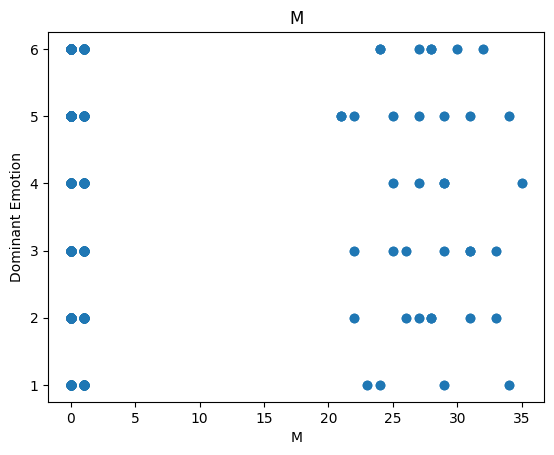

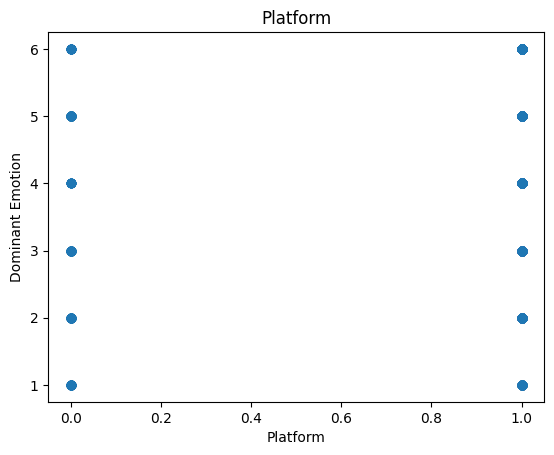

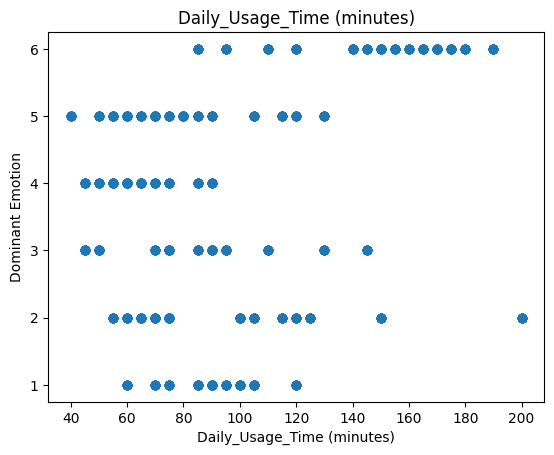

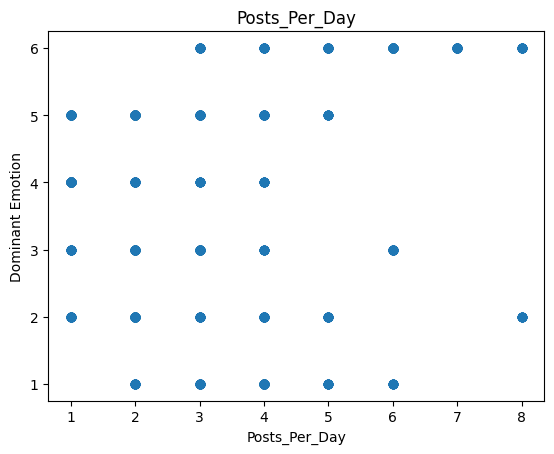

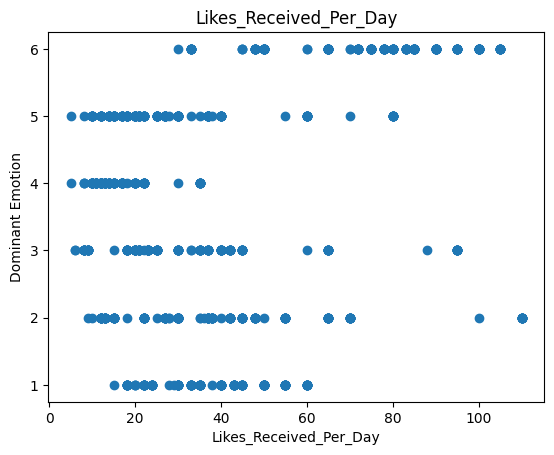

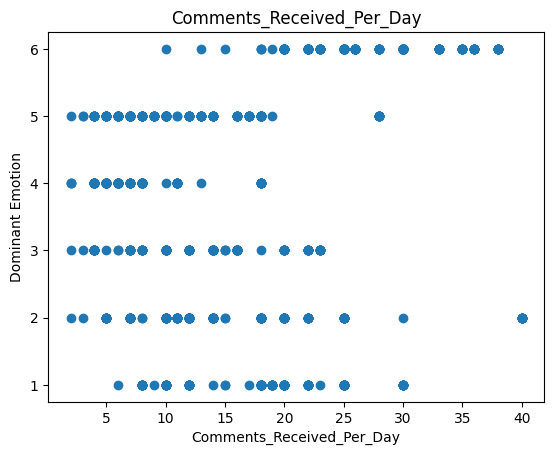

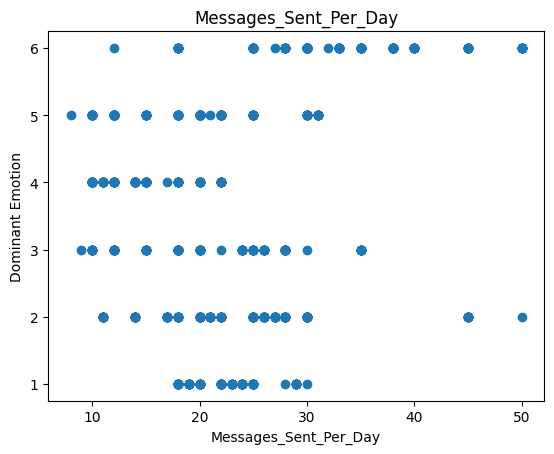

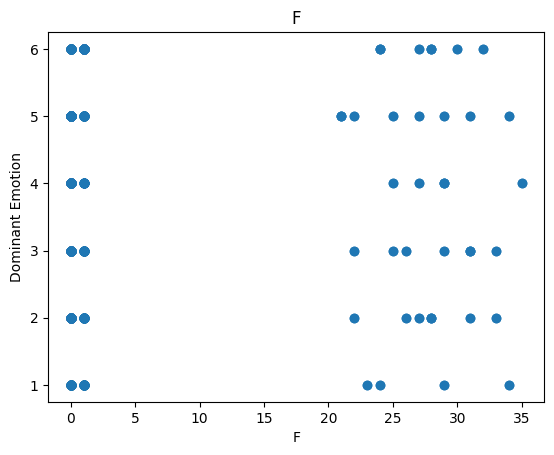

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["Dominant_Emotion"])
  plt.title(label)
  plt.ylabel("Dominant Emotion")
  plt.xlabel(label)
  plt.show()

Clearly, the graphs represent no linear relationship. So, we will only be pursuing Models that are not Linear.

Splitting Data into Train/Valid/Test

In [ ]:
# Shuffle the DataFrame
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
train_end = int(0.7 * len(df))
valid_end = int(0.851 * len(df))
train = df_shuffled.iloc[:train_end].copy()
valid = df_shuffled.iloc[train_end:valid_end].copy()
test = df_shuffled.iloc[valid_end:].copy()
print(len(train), len(valid), len(test))


700 151 149


In [ ]:

def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[1:]].values
    Y = dataframe[dataframe.columns[0]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    data = np.hstack((X, np.reshape(Y, (-1, 1))))

    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)

    return data, X, Y

print(train.dtypes)
print(train)


Dominant_Emotion              float64
M                              object
Platform                      float64
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
F                              object
dtype: object
     Dominant_Emotion   M  Platform  Daily_Usage_Time (minutes)  \
0                 1.0   0       1.0                       105.0   
1                 1.0   1       1.0                        85.0   
2                 3.0   1       1.0                        45.0   
3                 6.0   0       1.0                       175.0   
4                 3.0   0       1.0                        95.0   
..                ...  ..       ...                         ...   
695               5.0  34       0.0                        80.0   
696               2.0   0       1.0                        75.0   
697               6.0   1       0.0      

In [ ]:
train = train.dropna()
train,X_train,Y_train=scale_dataset(train,oversample=1)
len(X_train)
len(Y_train==1)
sum(Y_train==0)

np.int64(0)

In [ ]:
valid,X_valid,Y_valid=scale_dataset(valid,oversample=False)
test,X_test,Y_test=scale_dataset(test,oversample=False)

MODEL 1- KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
Y_pred=knn_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         1.0       0.83      0.79      0.81        19
         2.0       0.75      0.65      0.70        23
         3.0       0.79      0.84      0.81        31
         4.0       0.65      0.57      0.60        23
         5.0       0.72      0.95      0.82        22
         6.0       0.97      0.91      0.94        32

    accuracy                           0.79       150
   macro avg       0.79      0.78      0.78       150
weighted avg       0.80      0.79      0.79       150



In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train,Y_train)
Y_pred=knn_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         1.0       0.83      0.79      0.81        19
         2.0       0.74      0.74      0.74        23
         3.0       0.79      0.97      0.87        31
         4.0       0.63      0.52      0.57        23
         5.0       0.91      0.91      0.91        22
         6.0       0.97      0.91      0.94        32

    accuracy                           0.82       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.82      0.82      0.82       150



In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,Y_train)
Y_pred=knn_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         1.0       0.83      0.79      0.81        19
         2.0       0.85      0.74      0.79        23
         3.0       0.81      0.97      0.88        31
         4.0       0.67      0.61      0.64        23
         5.0       0.88      0.95      0.91        22
         6.0       0.97      0.91      0.94        32

    accuracy                           0.84       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.84      0.84      0.84       150



In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,Y_train)
Y_pred=knn_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         1.0       0.83      0.79      0.81        19
         2.0       0.84      0.70      0.76        23
         3.0       0.79      0.97      0.87        31
         4.0       0.67      0.61      0.64        23
         5.0       0.84      0.95      0.89        22
         6.0       0.97      0.88      0.92        32

    accuracy                           0.83       150
   macro avg       0.82      0.82      0.82       150
weighted avg       0.83      0.83      0.82       150



In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,Y_train)
Y_pred=knn_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         1.0       0.83      0.79      0.81        19
         2.0       0.89      0.74      0.81        23
         3.0       0.81      0.97      0.88        31
         4.0       0.68      0.65      0.67        23
         5.0       0.88      0.95      0.91        22
         6.0       0.97      0.91      0.94        32

    accuracy                           0.85       150
   macro avg       0.84      0.83      0.84       150
weighted avg       0.85      0.85      0.84       150



In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train,Y_train)
Y_pred=knn_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         1.0       0.83      0.79      0.81        19
         2.0       0.94      0.74      0.83        23
         3.0       0.81      0.97      0.88        31
         4.0       0.68      0.65      0.67        23
         5.0       0.88      0.95      0.91        22
         6.0       0.97      0.94      0.95        32

    accuracy                           0.85       150
   macro avg       0.85      0.84      0.84       150
weighted avg       0.86      0.85      0.85       150



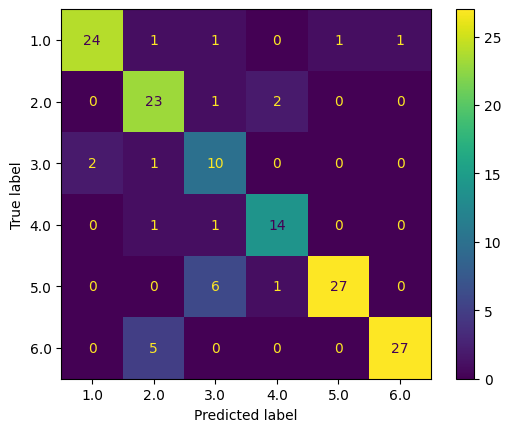

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train,Y_train)
Y_pred=knn_model.predict(X_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

for k in range(5, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred, average='weighted')

    print(f"k={k}: Accuracy={acc:.3f} | Weighted F1={f1:.3f}")

k=5: Accuracy=0.847 | Weighted F1=0.845
k=6: Accuracy=0.853 | Weighted F1=0.852
k=7: Accuracy=0.847 | Weighted F1=0.845
k=8: Accuracy=0.833 | Weighted F1=0.829
k=9: Accuracy=0.813 | Weighted F1=0.811
k=10: Accuracy=0.787 | Weighted F1=0.785
k=11: Accuracy=0.767 | Weighted F1=0.768
k=12: Accuracy=0.720 | Weighted F1=0.724
k=13: Accuracy=0.673 | Weighted F1=0.681
k=14: Accuracy=0.680 | Weighted F1=0.685
k=15: Accuracy=0.660 | Weighted F1=0.664
k=16: Accuracy=0.640 | Weighted F1=0.642
k=17: Accuracy=0.613 | Weighted F1=0.611
k=18: Accuracy=0.633 | Weighted F1=0.632
k=19: Accuracy=0.573 | Weighted F1=0.572
k=20: Accuracy=0.580 | Weighted F1=0.575


Hence, in KNN MODEL, n_neighbors=6 gives the best result which is
              precision    recall  f1-score   support

         1.0       0.83      0.79      0.81        19
         2.0       0.94      0.74      0.83        23
         3.0       0.81      0.97      0.88        31
         4.0       0.68      0.65      0.67        23
         5.0       0.88      0.95      0.91        22
         6.0       0.97      0.94      0.95        32
    accuracy                           0.85       150
   macro avg f1-0.84
weighted avg f1-0.85

Next we try Naive Bayes
MODEL 2- NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,Y_train)
Y_pred=nb_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         1.0       0.28      0.68      0.40        19
         2.0       0.43      0.13      0.20        23
         3.0       0.00      0.00      0.00        31
         4.0       0.42      0.87      0.56        23
         5.0       0.18      0.09      0.12        22
         6.0       0.65      0.75      0.70        32

    accuracy                           0.41       150
   macro avg       0.33      0.42      0.33       150
weighted avg       0.33      0.41      0.33       150



MODEL 3-LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression()
lg_model=lg_model.fit(X_train,Y_train)
y_pred=lg_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         1.0       0.28      0.68      0.40        19
         2.0       0.43      0.13      0.20        23
         3.0       0.00      0.00      0.00        31
         4.0       0.42      0.87      0.56        23
         5.0       0.18      0.09      0.12        22
         6.0       0.65      0.75      0.70        32

    accuracy                           0.41       150
   macro avg       0.33      0.42      0.33       150
weighted avg       0.33      0.41      0.33       150



MODEL 4- SUPPORT VECTOR MACHINES

In [ ]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model=svm_model.fit(X_train,Y_train)
y_pred=svm_model.predict(X_test)
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.53      0.84      0.65        19
         2.0       0.45      0.43      0.44        23
         3.0       0.60      0.39      0.47        31
         4.0       0.54      0.87      0.67        23
         5.0       0.44      0.18      0.26        22
         6.0       0.78      0.78      0.78        32

    accuracy                           0.58       150
   macro avg       0.56      0.58      0.55       150
weighted avg       0.58      0.58      0.55       150



MODEL 5-NEURAL NETWORK

/tmp/ipython-input-9-1501191171.py:2023: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Happiness":6,"Neutral":5,"Boredom":4,"Sadness":3,"Anxiety":2,"Anger":1}, inplace=True)
/tmp/ipython-input-9-1501191171.py:2024: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Instagram":1, "Twitter":1, "Facebook":1, "LinkedIn":1, "Snapchat":0, "Whatsapp":0, "Telegram":0},inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument 

700 151 149
16 nodes, dropout=0, lr=0.005, batch_size=32, loss=0.3040, acc=0.9123


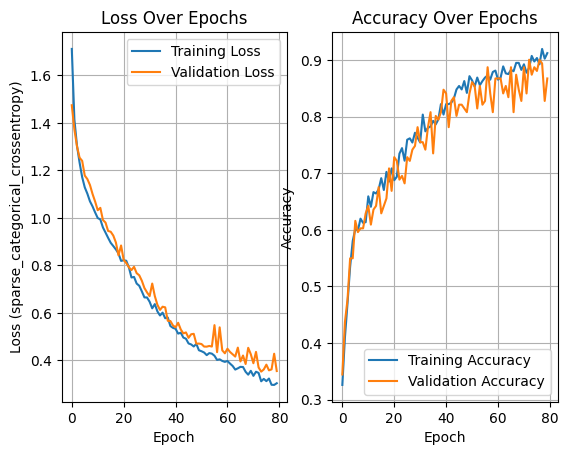

16 nodes, dropout=0, lr=0.005, batch_size=64, loss=0.4891, acc=0.8407


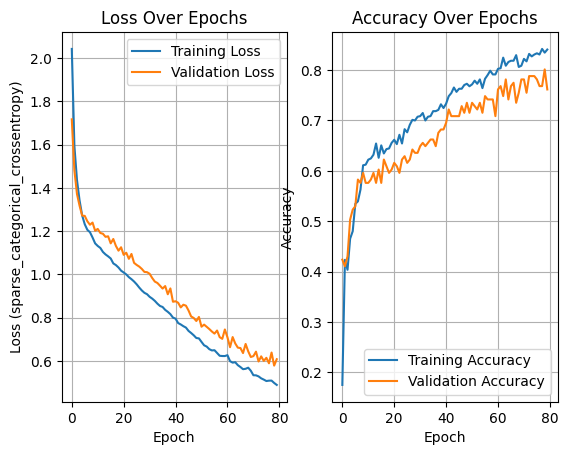

16 nodes, dropout=0, lr=0.001, batch_size=32, loss=0.8319, acc=0.6840


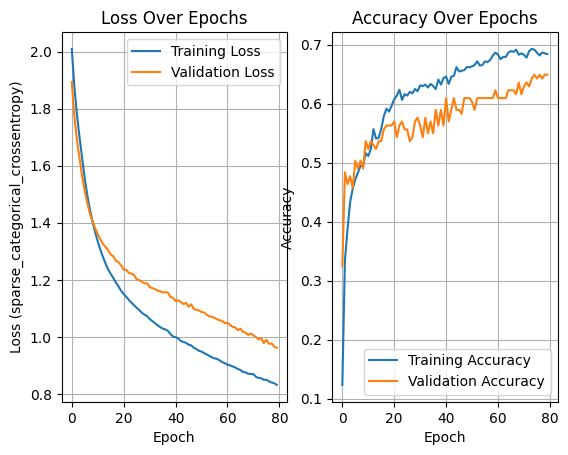

16 nodes, dropout=0, lr=0.001, batch_size=64, loss=0.9733, acc=0.6481


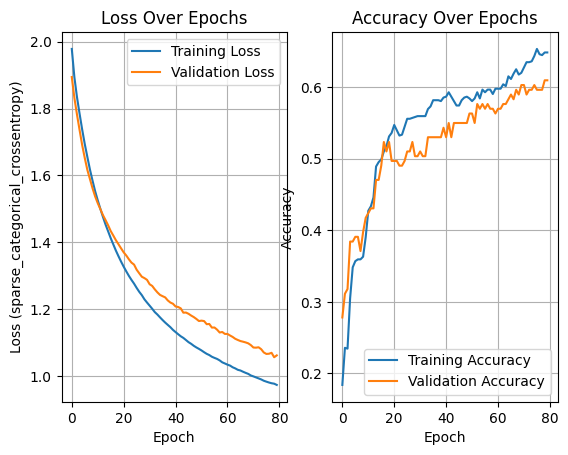

16 nodes, dropout=0.2, lr=0.005, batch_size=32, loss=0.8589, acc=0.6593


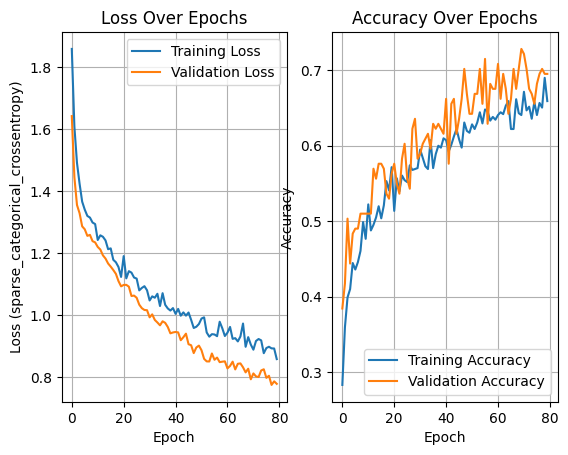

16 nodes, dropout=0.2, lr=0.005, batch_size=64, loss=0.9293, acc=0.6543


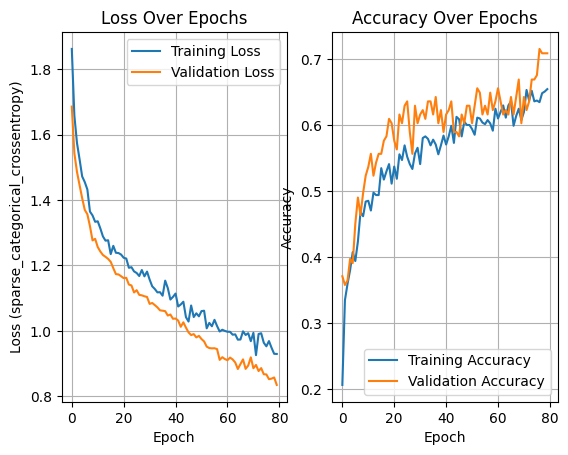

16 nodes, dropout=0.2, lr=0.001, batch_size=32, loss=1.1716, acc=0.5494


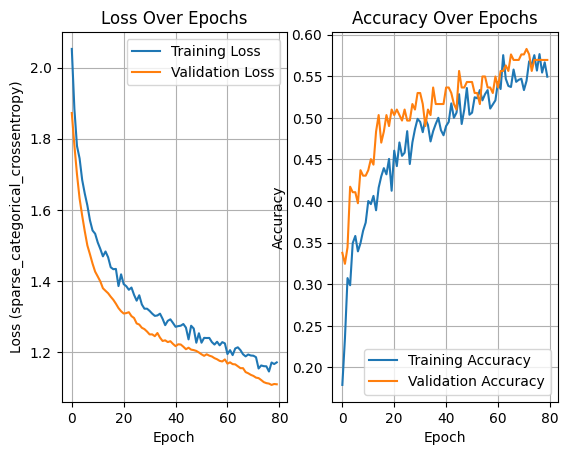

16 nodes, dropout=0.2, lr=0.001, batch_size=64, loss=1.2150, acc=0.5259


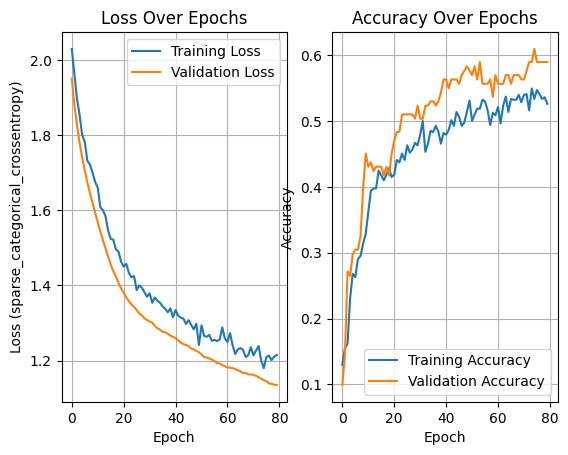

32 nodes, dropout=0, lr=0.005, batch_size=32, loss=0.2811, acc=0.8901


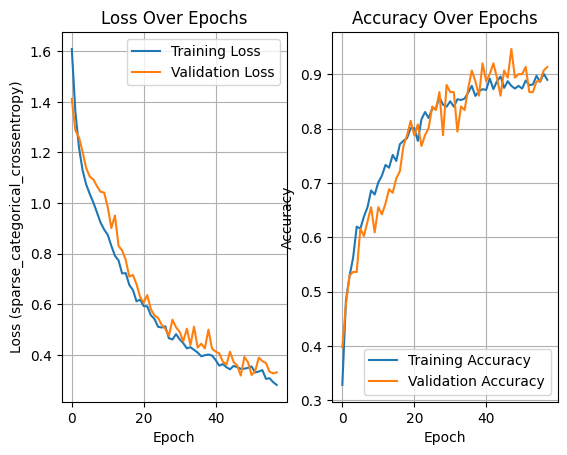

32 nodes, dropout=0, lr=0.005, batch_size=64, loss=0.3005, acc=0.8877


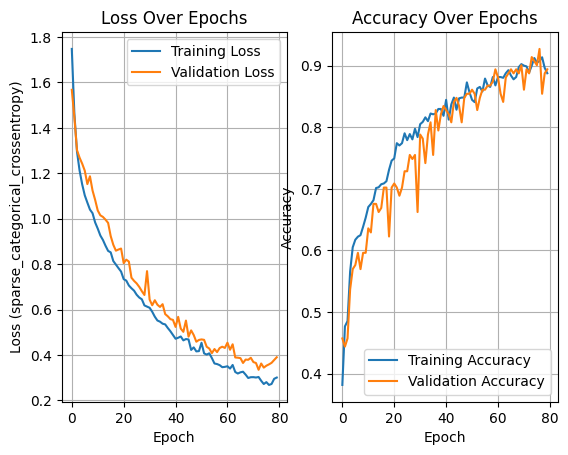

32 nodes, dropout=0, lr=0.001, batch_size=32, loss=0.5701, acc=0.8136


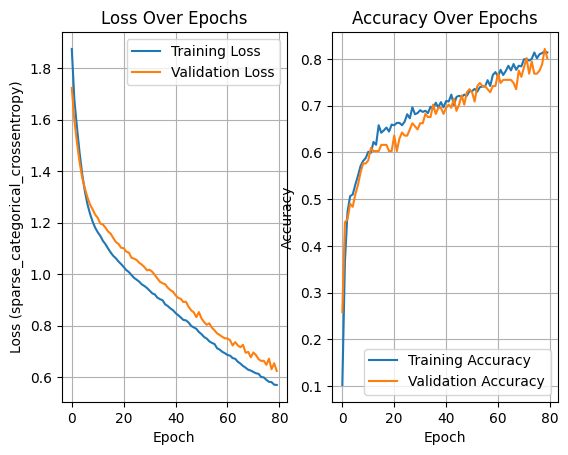

32 nodes, dropout=0, lr=0.001, batch_size=64, loss=0.7675, acc=0.7531


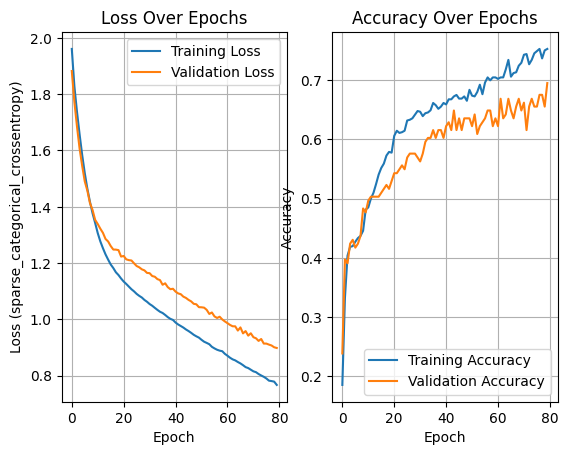

32 nodes, dropout=0.2, lr=0.005, batch_size=32, loss=0.5898, acc=0.7704


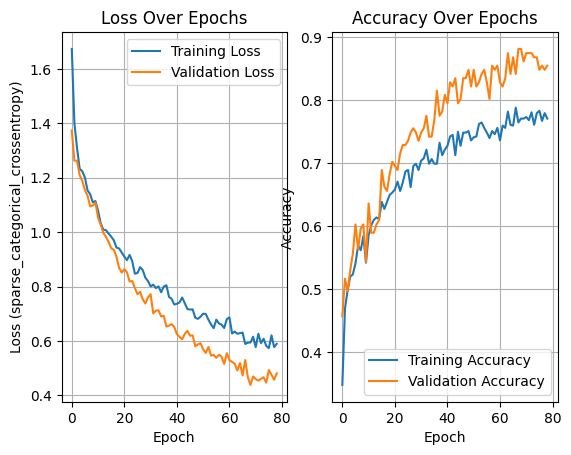

32 nodes, dropout=0.2, lr=0.005, batch_size=64, loss=0.5858, acc=0.7877


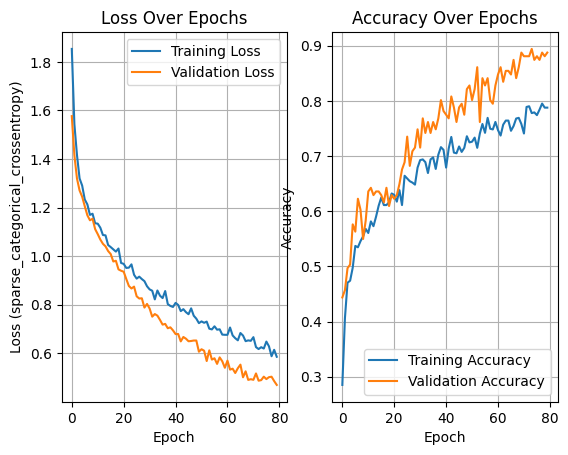

32 nodes, dropout=0.2, lr=0.001, batch_size=32, loss=0.9241, acc=0.6667


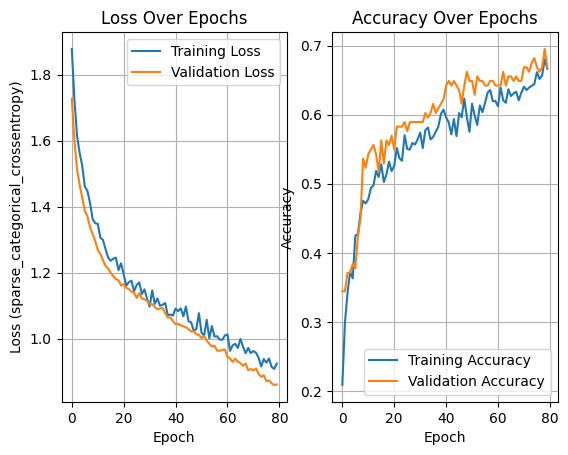

32 nodes, dropout=0.2, lr=0.001, batch_size=64, loss=1.0641, acc=0.6049


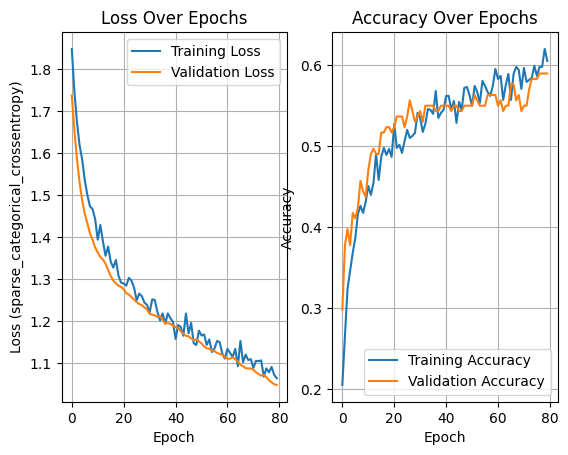

64 nodes, dropout=0, lr=0.005, batch_size=32, loss=0.1401, acc=0.9519


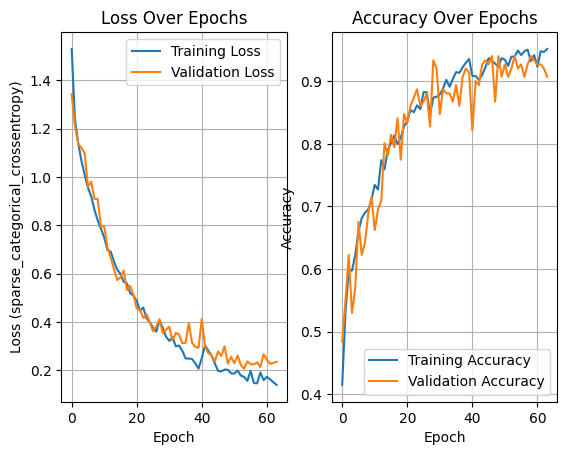

64 nodes, dropout=0, lr=0.005, batch_size=64, loss=0.2446, acc=0.9074


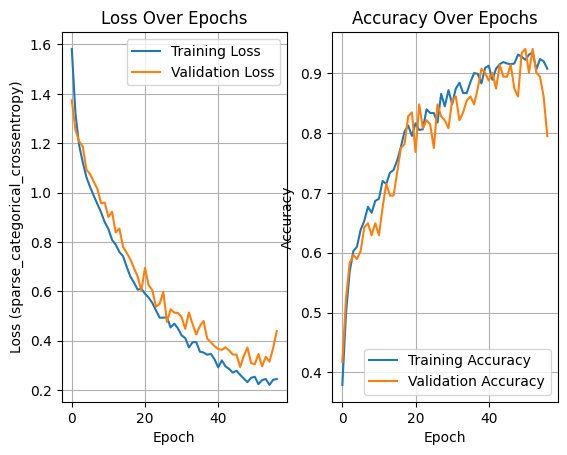

64 nodes, dropout=0, lr=0.001, batch_size=32, loss=0.3592, acc=0.8901


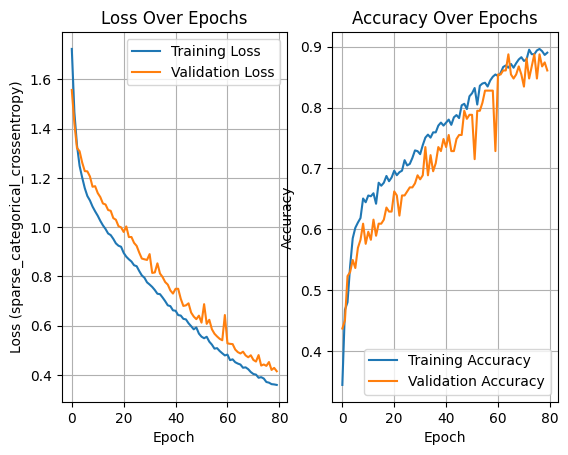

64 nodes, dropout=0, lr=0.001, batch_size=64, loss=0.4659, acc=0.8728


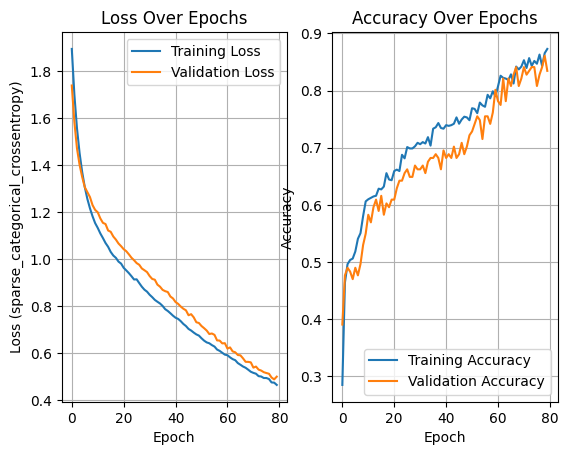

64 nodes, dropout=0.2, lr=0.005, batch_size=32, loss=0.3387, acc=0.8630


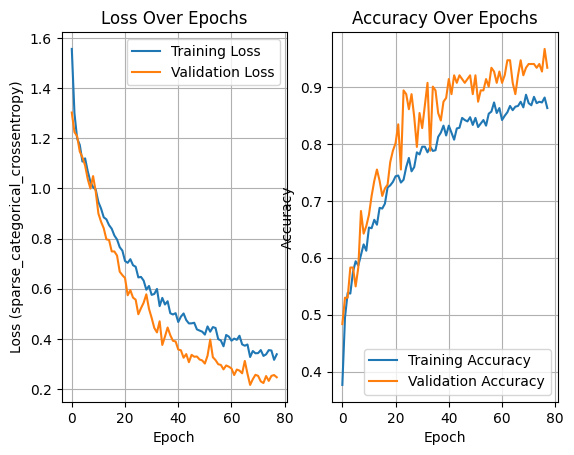

64 nodes, dropout=0.2, lr=0.005, batch_size=64, loss=0.3792, acc=0.8580


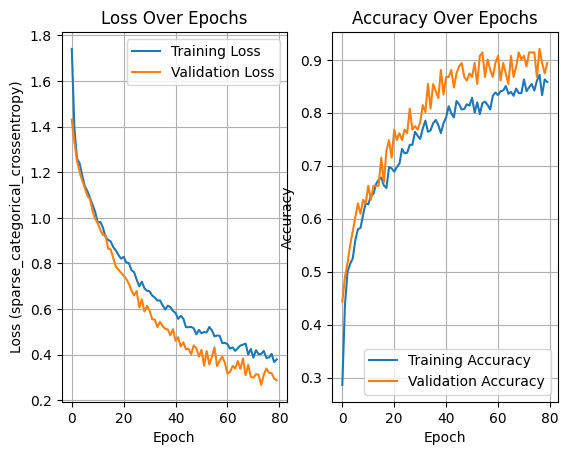

64 nodes, dropout=0.2, lr=0.001, batch_size=32, loss=0.7110, acc=0.7580


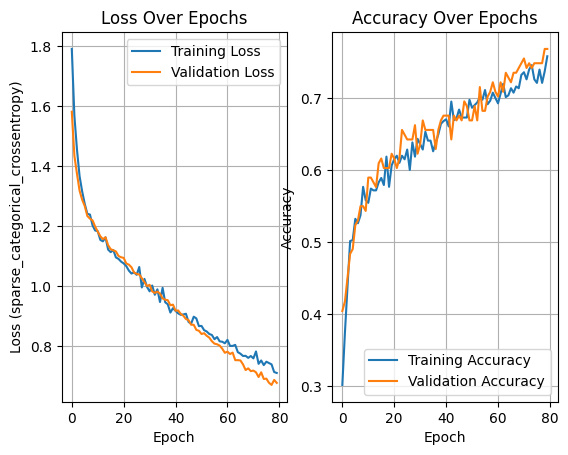

64 nodes, dropout=0.2, lr=0.001, batch_size=64, loss=0.8480, acc=0.6975


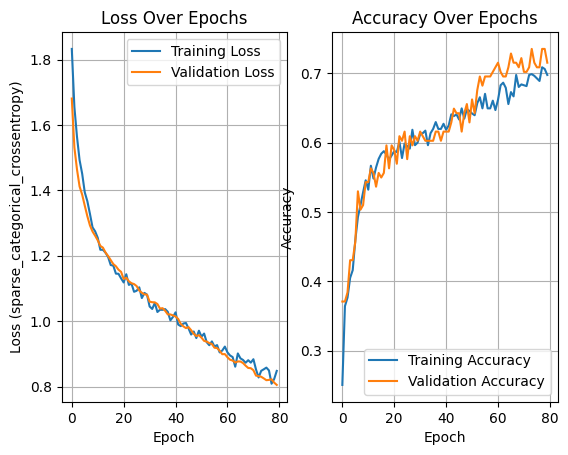

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from io import StringIO


csv_data='''
User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion

1,25,Female,Instagram,120,3,45,10,12,Happiness

2,30,Male,Twitter,90,5,20,25,30,Anger

3,22,Non-binary,Facebook,60,2,15,5,20,Neutral

4,28,Female,Instagram,200,8,100,30,50,Anxiety

5,33,Male,LinkedIn,45,1,5,2,10,Boredom

6,21,Male,Instagram,150,4,60,15,25,Happiness

7,27,Female,Twitter,85,3,30,10,18,Anger

8,24,Non-binary,Facebook,110,6,25,12,22,Sadness

9,29,Female,LinkedIn,55,2,10,3,8,Neutral

10,31,Male,Instagram,170,5,80,20,35,Happiness

11,23,Female,Twitter,75,4,35,7,20,Anxiety

12,26,Non-binary,Facebook,95,3,20,10,18,Sadness

13,34,Male,LinkedIn,65,1,12,4,15,Boredom

14,22,Female,Instagram,180,7,90,25,40,Happiness

15,28,Male,Twitter,100,6,40,23,28,Anger

16,21,Non-binary,Facebook,40,1,5,2,10,Neutral

17,35,Female,Instagram,125,4,55,18,30,Anxiety

18,27,Male,Twitter,90,3,33,15,25,Sadness

19,23,Non-binary,LinkedIn,50,1,8,3,12,Neutral

20,32,Female,Instagram,140,5,70,22,33,Happiness

21,26,Male,Facebook,75,2,25,10,18,Anxiety

22,24,Female,Twitter,105,4,28,14,20,Anger

23,29,Male,LinkedIn,60,2,11,5,17,Boredom

24,33,Non-binary,Instagram,190,8,95,26,45,Happiness

25,22,Female,Twitter,70,3,20,12,15,Sadness

26,31,Male,Facebook,80,2,18,8,21,Neutral

27,27,Non-binary,LinkedIn,55,1,9,2,11,Anxiety

28,25,Female,Instagram,160,6,85,19,32,Happiness

29,30,Male,Twitter,90,4,38,17,24,Anger

30,26,Non-binary,Facebook,45,1,6,3,10,Sadness

31,34,Female,LinkedIn,65,2,13,4,14,Boredom

32,28,Male,Instagram,145,5,75,20,35,Happiness

33,23,Non-binary,Twitter,70,3,27,11,18,Neutral

34,21,Female,Instagram,130,6,88,15,30,Sadness

35,29,Male,Facebook,65,2,22,8,20,Anxiety

36,24,Non-binary,LinkedIn,55,1,10,5,11,Boredom

37,33,Female,Instagram,170,7,90,25,40,Happiness

38,27,Male,Twitter,85,4,35,15,20,Anger

39,22,Female,Instagram,115,3,55,12,25,Neutral

40,28,Non-binary,Facebook,100,2,18,10,22,Anxiety

41,31,Male,LinkedIn,45,1,6,2,9,Sadness

42,25,Female,Instagram,150,6,80,18,30,Happiness

43,29,Male,Twitter,95,4,40,20,22,Anger

44,23,Non-binary,Facebook,105,2,20,8,18,Neutral

45,35,Female,LinkedIn,60,1,12,5,14,Boredom

46,30,Male,Instagram,175,7,85,23,38,Happiness

47,21,Female,Twitter,90,3,33,12,20,Sadness

48,26,Non-binary,Facebook,75,2,28,11,18,Anxiety

49,32,Male,Instagram,130,5,70,19,31,Neutral

50,28,Female,LinkedIn,55,1,8,4,10,Boredom

51,27,Male,Instagram,165,6,78,22,27,Happiness

52,24,Female,Twitter,75,3,29,15,19,Anger

53,29,Non-binary,Facebook,85,2,25,7,20,Neutral

54,33,Female,Instagram,145,4,60,18,35,Sadness

55,31,Male,LinkedIn,60,1,10,3,17,Anxiety

56,22,Female,Whatsapp,70,2,40,8,21,Anxiety

57,25,Male,Telegram,90,3,20,10,22,Boredom

58,29,Non-binary,Snapchat,50,2,15,5,18,Sadness

59,28,Female,Twitter,95,4,45,20,25,Happiness

60,27,Male,Facebook,60,1,10,4,15,Boredom

61,30,Female,Instagram,175,6,70,23,33,Happiness

62,23,Male,Whatsapp,70,3,20,8,18,Anger

63,34,Non-binary,Telegram,80,2,18,7,20,Neutral

64,26,Female,Snapchat,120,4,50,15,30,Anxiety

65,25,Male,Twitter,90,6,40,12,26,Sadness

66,29,Non-binary,Facebook,60,1,8,2,12,Boredom

67,28,Male,Instagram,165,5,75,18,35,Happiness

68,31,Female,Whatsapp,65,2,25,8,20,Neutral

69,27,Male,Telegram,105,3,45,15,28,Anxiety

70,22,Non-binary,Snapchat,75,2,18,6,20,Sadness

71,24,Female,Instagram,140,4,60,18,30,Happiness

72,35,Male,Twitter,70,1,12,7,10,Boredom

73,21,Non-binary,Facebook,55,3,15,5,12,Neutral

74,29,Female,Whatsapp,90,2,20,9,22,Anger

75,25,Male,Telegram,80,4,28,11,25,Neutral

76,28,Non-binary,Snapchat,115,3,36,12,27,Anxiety

77,32,Female,Instagram,155,6,72,20,38,Happiness

78,26,Male,Twitter,75,2,22,10,18,Sadness

79,33,Non-binary,Facebook,65,1,12,5,14,Anxiety

80,27,Female,Whatsapp,90,4,35,14,20,Neutral

81,31,Male,Telegram,50,2,18,6,12,Sadness

82,24,Non-binary,Snapchat,85,3,30,13,18,Happiness

83,34,Female,Instagram,120,5,55,19,25,Anger

84,22,Male,Twitter,70,1,20,5,22,Neutral

85,29,Non-binary,Facebook,75,2,18,8,20,Boredom

86,28,Female,Whatsapp,100,4,35,12,26,Anxiety

87,31,Male,Telegram,85,3,40,15,28,Sadness

88,21,Non-binary,Snapchat,60,1,15,5,12,Neutral

89,25,Female,Instagram,170,6,78,22,33,Happiness

90,30,Male,Twitter,70,2,28,10,20,Anxiety

91,27,Non-binary,Facebook,50,1,8,2,10,Boredom

92,32,Female,Whatsapp,105,4,50,18,25,Anger

93,24,Male,Telegram,75,3,33,13,22,Neutral

94,29,Female,Snapchat,95,2,20,7,28,Sadness

95,26,Male,Instagram,150,5,65,20,30,Anxiety

96,33,Non-binary,Twitter,85,4,30,13,18,Boredom

97,22,Female,Facebook,70,1,12,5,10,Neutral

98,35,Male,Whatsapp,110,3,45,20,25,Happiness

99,28,Non-binary,Telegram,60,2,15,6,18,Anger

100,27,Female,Snapchat,120,4,38,13,22,Neutral

101,25,Female,Instagram,120,5,50,20,25,Happiness

102,30,Male,Twitter,90,4,30,20,22,Anger

103,22,Non-binary,Facebook,60,2,20,10,15,Neutral

104,28,Female,Instagram,200,8,110,40,45,Anxiety

105,33,Male,LinkedIn,45,1,10,5,12,Boredom

106,21,Male,Instagram,150,5,65,25,30,Happiness

107,27,Female,Twitter,85,3,40,18,20,Anger

108,24,Non-binary,Facebook,110,6,35,16,25,Sadness

109,29,Female,LinkedIn,55,2,15,5,10,Neutral

110,31,Male,Instagram,170,7,90,35,40,Happiness

111,23,Female,Twitter,75,4,45,20,25,Anxiety

112,26,Non-binary,Facebook,95,3,30,14,18,Sadness

113,34,Male,LinkedIn,65,1,14,6,15,Boredom

114,22,Female,Instagram,180,8,100,38,45,Happiness

115,28,Male,Twitter,100,6,50,30,29,Anger

116,21,Non-binary,Facebook,40,1,10,4,12,Neutral

117,35,Female,Instagram,125,5,65,22,28,Anxiety

118,27,Male,Twitter,90,3,40,16,24,Sadness

119,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

120,32,Female,Instagram,140,6,75,28,30,Happiness

121,26,Male,Facebook,75,2,30,14,20,Anxiety

122,24,Female,Twitter,105,4,35,20,23,Anger

123,29,Male,LinkedIn,60,2,17,8,15,Boredom

124,33,Non-binary,Instagram,190,8,105,36,50,Happiness

125,22,Female,Twitter,70,3,25,16,15,Sadness

126,31,Male,Facebook,80,2,20,10,20,Neutral

127,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

128,25,Female,Instagram,160,6,85,26,30,Happiness

129,30,Male,Twitter,90,4,43,19,24,Anger

130,26,Non-binary,Facebook,45,1,8,4,12,Sadness

131,34,Female,LinkedIn,65,2,17,5,14,Boredom

132,28,Male,Instagram,145,7,80,30,35,Happiness

133,23,Non-binary,Twitter,70,3,30,14,18,Neutral

134,21,Female,Instagram,130,6,95,22,28,Sadness

135,29,Male,Facebook,65,2,27,11,22,Anxiety

136,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

137,33,Female,Instagram,170,7,95,30,38,Happiness

138,27,Male,Twitter,85,4,45,18,24,Anger

139,22,Female,Instagram,115,3,60,17,30,Neutral

140,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

141,31,Male,LinkedIn,45,1,9,4,10,Sadness

142,25,Female,Instagram,150,6,90,26,30,Happiness

143,29,Male,Twitter,95,4,50,22,22,Anger

144,23,Non-binary,Facebook,105,2,25,12,18,Neutral

145,35,Female,LinkedIn,60,1,15,7,14,Boredom

146,30,Male,Instagram,175,7,100,33,38,Happiness

147,21,Female,Twitter,90,3,37,14,20,Sadness

148,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

149,32,Male,Instagram,130,5,80,28,31,Neutral

150,28,Female,LinkedIn,55,1,12,6,10,Boredom

151,27,Male,Instagram,165,6,85,30,28,Happiness

152,24,Female,Twitter,75,3,33,18,19,Anger

153,29,Non-binary,Facebook,85,2,27,9,20,Neutral

154,33,Female,Instagram,145,4,65,23,35,Sadness

155,31,Male,LinkedIn,60,1,15,7,17,Anxiety

156,22,Female,Whatsapp,70,2,42,10,21,Anxiety

157,25,Male,Telegram,90,3,22,11,22,Boredom

158,29,Non-binary,Snapchat,50,2,18,7,18,Sadness

159,28,Female,Twitter,95,4,48,22,25,Happiness

160,27,Male,Facebook,60,1,12,5,15,Boredom

161,30,Female,Instagram,175,6,72,30,33,Happiness

162,23,Male,Whatsapp,70,3,22,10,18,Anger

163,34,Non-binary,Telegram,80,2,21,8,20,Neutral

164,26,Female,Snapchat,120,4,55,18,30,Anxiety

165,25,Male,Twitter,90,6,42,14,26,Sadness

166,29,Non-binary,Facebook,60,1,12,4,12,Boredom

167,28,Male,Instagram,165,5,78,23,35,Happiness

168,31,Female,Whatsapp,65,2,27,10,20,Neutral

169,27,Male,Telegram,105,3,48,20,28,Anxiety

170,22,Non-binary,Snapchat,75,2,21,8,20,Sadness

171,24,Female,Instagram,140,4,65,22,30,Happiness

172,35,Male,Twitter,70,1,13,8,10,Boredom

173,21,Non-binary,Facebook,55,3,17,7,12,Neutral

174,29,Female,Whatsapp,90,2,24,12,22,Anger

175,25,Male,Telegram,80,4,30,13,25,Neutral

176,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety

177,32,Female,Instagram,155,6,75,25,38,Happiness

178,26,Male,Twitter,75,2,23,12,18,Sadness

179,33,Non-binary,Facebook,65,1,13,7,14,Anxiety

180,27,Female,Whatsapp,90,4,37,18,20,Neutral

181,31,Male,Telegram,50,2,20,10,12,Sadness

182,24,Non-binary,Snapchat,85,3,33,20,18,Happiness

183,34,Female,Instagram,120,5,60,25,25,Anger

184,22,Male,Twitter,70,1,22,7,22,Neutral

185,29,Non-binary,Facebook,75,2,20,8,20,Boredom

186,28,Female,Whatsapp,100,4,37,14,26,Anxiety

187,31,Male,Telegram,85,3,45,20,28,Sadness

188,21,Non-binary,Snapchat,60,1,18,7,12,Neutral

189,25,Female,Instagram,170,6,83,30,33,Happiness

190,30,Male,Twitter,70,2,30,12,20,Anxiety

191,27,Non-binary,Facebook,50,1,10,4,10,Boredom

192,32,Female,Whatsapp,105,4,55,25,25,Anger

193,24,Male,Telegram,75,3,37,16,22,Neutral

194,29,Female,Snapchat,95,2,23,10,28,Sadness

195,26,Male,Instagram,150,5,70,25,30,Anxiety

196,33,Non-binary,Twitter,85,4,35,18,18,Boredom

197,22,Female,Facebook,70,1,14,6,10,Neutral

198,35,Male,Whatsapp,110,3,50,25,25,Happiness

199,28,Non-binary,Telegram,60,2,18,8,18,Anger

200,27,Female,Snapchat,120,4,40,18,22,Neutral

201,25,Female,Instagram,120,5,50,20,25,Happiness

202,30,Male,Twitter,90,4,30,20,22,Anger

203,22,Non-binary,Facebook,60,2,20,10,15,Neutral

204,28,Female,Instagram,200,8,110,40,45,Anxiety

205,33,Male,LinkedIn,45,1,10,5,12,Boredom

206,21,Male,Instagram,150,5,65,25,30,Happiness

207,27,Female,Twitter,85,3,40,18,20,Anger

208,24,Non-binary,Facebook,110,6,35,16,25,Sadness

209,29,Female,LinkedIn,55,2,15,5,10,Neutral

210,31,Male,Instagram,170,7,90,35,40,Happiness

211,23,Female,Twitter,75,4,45,20,25,Anxiety

212,26,Non-binary,Facebook,95,3,30,14,18,Sadness

213,34,Male,LinkedIn,65,1,14,6,15,Boredom

214,22,Female,Instagram,180,8,100,38,45,Happiness

215,28,Male,Twitter,100,6,50,30,29,Anger

216,21,Non-binary,Facebook,40,1,10,4,12,Neutral

217,35,Female,Instagram,125,5,65,22,28,Anxiety

218,27,Male,Twitter,90,3,40,16,24,Sadness

219,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

220,32,Female,Instagram,140,6,75,28,30,Happiness

221,26,Male,Facebook,75,2,30,14,20,Anxiety

222,24,Female,Twitter,105,4,35,20,23,Anger

223,29,Male,LinkedIn,60,2,17,8,15,Boredom

224,33,Non-binary,Instagram,190,8,105,36,50,Happiness

225,22,Female,Twitter,70,3,25,16,15,Sadness

226,31,Male,Facebook,80,2,20,10,20,Neutral

227,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

228,25,Female,Instagram,160,6,85,26,30,Happiness

229,30,Male,Twitter,90,4,43,19,24,Anger

230,26,Non-binary,Facebook,45,1,8,4,12,Sadness

231,34,Female,LinkedIn,65,2,17,5,14,Boredom

232,28,Male,Instagram,145,7,80,30,35,Happiness

233,23,Non-binary,Twitter,70,3,30,14,18,Neutral

234,21,Female,Instagram,130,6,95,22,28,Sadness

235,29,Male,Facebook,65,2,27,11,22,Anxiety

236,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

237,33,Female,Instagram,170,7,95,30,38,Happiness

238,27,Male,Twitter,85,4,45,18,24,Anger

239,22,Female,Instagram,115,3,60,17,30,Neutral

240,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

241,31,Male,LinkedIn,45,1,9,4,10,Sadness

242,25,Female,Instagram,150,6,90,26,30,Happiness

243,29,Male,Twitter,95,4,50,22,22,Anger

244,23,Non-binary,Facebook,105,2,25,12,18,Neutral

245,35,Female,LinkedIn,60,1,15,7,14,Boredom

246,30,Male,Instagram,175,7,100,33,38,Happiness

247,21,Female,Twitter,90,3,37,14,20,Sadness

248,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

249,32,Male,Instagram,130,5,80,28,31,Neutral

250,28,Female,LinkedIn,55,1,12,6,10,Boredom

251,Male,27,Instagram,165,6,85,30,28,Happiness

252,Female,24,Twitter,75,3,33,18,19,Anger

253,Non-binary,29,Facebook,85,2,27,9,20,Neutral

254,Female,33,Instagram,145,4,65,23,35,Sadness

255,Male,31,LinkedIn,60,1,15,7,17,Anxiety

256,Female,22,Whatsapp,70,2,42,10,21,Anxiety

257,Male,25,Telegram,90,3,22,11,22,Boredom

258,Non-binary,29,Snapchat,50,2,18,7,18,Sadness

259,Female,28,Twitter,95,4,48,22,25,Happiness

260,Male,27,Facebook,60,1,12,5,15,Boredom

261,Female,30,Instagram,175,6,72,30,33,Happiness

262,Male,23,Whatsapp,70,3,22,10,18,Anger

263,Non-binary,34,Telegram,80,2,21,8,20,Neutral

264,Female,26,Snapchat,120,4,55,18,30,Anxiety

265,Male,25,Twitter,90,6,42,14,26,Sadness

266,Non-binary,29,Facebook,60,1,12,4,12,Boredom

267,Male,28,Instagram,165,5,78,23,35,Happiness

268,Female,31,Whatsapp,65,2,27,10,20,Neutral

269,Male,27,Telegram,105,3,48,20,28,Anxiety

270,Non-binary,22,Snapchat,75,2,21,8,20,Sadness

271,Female,24,Instagram,140,4,65,22,30,Happiness

272,Male,35,Twitter,70,1,13,8,10,Boredom

273,Non-binary,21,Facebook,55,3,17,7,12,Neutral

274,Female,29,Whatsapp,90,2,24,12,22,Anger

275,Male,25,Telegram,80,4,30,13,25,Neutral

276,Non-binary,28,Snapchat,115,3,38,18,27,Anxiety

277,Female,32,Instagram,155,6,75,25,38,Happiness

278,Male,26,Twitter,75,2,23,12,18,Sadness

279,Non-binary,33,Facebook,65,1,13,7,14,Anxiety

280,Female,27,Whatsapp,90,4,37,18,20,Neutral

281,Male,31,Telegram,50,2,20,10,12,Sadness

282,Non-binary,24,Snapchat,85,3,33,20,18,Happiness

283,Female,34,Instagram,120,5,60,25,25,Anger

284,Male,22,Twitter,70,1,22,7,22,Neutral

285,Non-binary,29,Facebook,75,2,20,8,20,Boredom

286,Female,28,Whatsapp,100,4,37,14,26,Anxiety

287,Male,31,Telegram,85,3,45,20,28,Sadness

288,Non-binary,21,Snapchat,60,1,18,7,12,Neutral

289,25,Female,Instagram,170,6,83,30,33,Happiness

290,30,Male,Twitter,70,2,30,12,20,Anxiety

291,27,Non-binary,Facebook,50,1,10,4,10,Boredom

292,32,Female,Whatsapp,105,4,55,25,25,Anger

293,24,Male,Telegram,75,3,37,16,22,Neutral

294,29,Female,Snapchat,95,2,23,10,28,Sadness

295,26,Male,Instagram,150,5,70,25,30,Anxiety

296,33,Non-binary,Twitter,85,4,35,18,18,Boredom

297,22,Female,Facebook,70,1,14,6,10,Neutral

298,35,Male,Whatsapp,110,3,50,25,25,Happiness

299,28,Non-binary,Telegram,60,2,18,8,18,Anger

300,27,Female,Snapchat,120,4,40,18,22,Neutral

301,25,Female,Instagram,120,5,50,20,25,Happiness

302,30,Male,Twitter,90,4,30,20,22,Anger

303,22,Non-binary,Facebook,60,2,20,10,15,Neutral

304,28,Female,Instagram,200,8,110,40,45,Anxiety

305,33,Male,LinkedIn,45,1,10,5,12,Boredom

306,21,Male,Instagram,150,5,65,25,30,Happiness

307,27,Female,Twitter,85,3,40,18,20,Anger

308,24,Non-binary,Facebook,110,6,35,16,25,Sadness

309,29,Female,LinkedIn,55,2,15,5,10,Neutral

310,31,Male,Instagram,170,7,90,35,40,Happiness

311,23,Female,Twitter,75,4,45,20,25,Anxiety

312,26,Non-binary,Facebook,95,3,30,14,18,Sadness

313,34,Male,LinkedIn,65,1,14,6,15,Boredom

314,22,Female,Instagram,180,8,100,38,45,Happiness

315,28,Male,Twitter,100,6,50,30,29,Anger

316,21,Non-binary,Facebook,40,1,10,4,12,Neutral

317,35,Female,Instagram,125,5,65,22,28,Anxiety

318,27,Male,Twitter,90,3,40,16,24,Sadness

319,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

320,32,Female,Instagram,140,6,75,28,30,Happiness

321,26,Male,Facebook,75,2,30,14,20,Anxiety

322,24,Female,Twitter,105,4,35,20,23,Anger

323,29,Male,LinkedIn,60,2,17,8,15,Boredom

324,33,Non-binary,Instagram,190,8,105,36,50,Happiness

325,22,Female,Twitter,70,3,25,16,15,Sadness

326,31,Male,Facebook,80,2,20,10,20,Neutral

327,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

328,25,Female,Instagram,160,6,85,26,30,Happiness

329,30,Male,Twitter,90,4,43,19,24,Anger

330,26,Non-binary,Facebook,45,1,8,4,12,Sadness

331,34,Female,LinkedIn,65,2,17,5,14,Boredom

332,28,Male,Instagram,145,7,80,30,35,Happiness

333,23,Non-binary,Twitter,70,3,30,14,18,Neutral

334,21,Female,Instagram,130,6,95,22,28,Sadness

335,29,Male,Facebook,65,2,27,11,22,Anxiety

336,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

337,33,Female,Instagram,170,7,95,30,38,Happiness

338,27,Male,Twitter,85,4,45,18,24,Anger

339,22,Female,Instagram,115,3,60,17,30,Neutral

340,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

341,31,Male,LinkedIn,45,1,9,4,10,Sadness

342,25,Female,Instagram,150,6,90,26,30,Happiness

343,29,Male,Twitter,95,4,50,22,22,Anger

344,23,Non-binary,Facebook,105,2,25,12,18,Neutral

345,35,Female,LinkedIn,60,1,15,7,14,Boredom

346,30,Male,Instagram,175,7,100,33,38,Happiness

347,21,Female,Twitter,90,3,37,14,20,Sadness

348,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

349,32,Male,Instagram,130,5,80,28,31,Neutral

350,28,Female,LinkedIn,55,1,12,6,10,Boredom

351,27,Male,Instagram,165,6,85,30,28,Happiness

352,24,Female,Twitter,75,3,33,18,19,Anger

353,29,Non-binary,Facebook,85,2,27,9,20,Neutral

354,33,Female,Instagram,145,4,65,23,35,Sadness

355,31,Male,LinkedIn,60,1,15,7,17,Anxiety

356,22,Female,Whatsapp,70,2,42,10,21,Anxiety

357,25,Male,Telegram,90,3,22,11,22,Boredom

358,29,Non-binary,Snapchat,50,2,18,7,18,Sadness

359,28,Female,Twitter,95,4,48,22,25,Happiness

360,27,Male,Facebook,60,1,12,5,15,Boredom

361,30,Female,Instagram,175,6,72,30,33,Happiness

362,23,Male,Whatsapp,70,3,22,10,18,Anger

363,34,Non-binary,Telegram,80,2,21,8,20,Neutral

364,26,Female,Snapchat,120,4,55,18,30,Anxiety

365,25,Male,Twitter,90,6,42,14,26,Sadness

366,29,Non-binary,Facebook,60,1,12,4,12,Boredom

367,28,Male,Instagram,165,5,78,23,35,Happiness

368,31,Female,Whatsapp,65,2,27,10,20,Neutral

369,27,Male,Telegram,105,3,48,20,28,Anxiety

370,22,Non-binary,Snapchat,75,2,21,8,20,Sadness

371,24,Female,Instagram,140,4,65,22,30,Happiness

372,35,Male,Twitter,70,1,13,8,10,Boredom

373,21,Non-binary,Facebook,55,3,17,7,12,Neutral

374,29,Female,Whatsapp,90,2,24,12,22,Anger

375,25,Male,Telegram,80,4,30,13,25,Neutral

376,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety

377,32,Female,Instagram,155,6,75,25,38,Happiness

378,26,Male,Twitter,75,2,23,12,18,Sadness

379,33,Non-binary,Facebook,65,1,13,7,14,Anxiety

380,27,Female,Whatsapp,90,4,37,18,20,Neutral

381,31,Male,Telegram,50,2,20,10,12,Sadness

382,24,Non-binary,Snapchat,85,3,33,20,18,Happiness

383,34,Female,Instagram,120,5,60,25,25,Anger

384,22,Male,Twitter,70,1,22,7,22,Neutral

385,29,Non-binary,Facebook,75,2,20,8,20,Boredom

386,28,Female,Whatsapp,100,4,37,14,26,Anxiety

387,31,Male,Telegram,85,3,45,20,28,Sadness

388,21,Non-binary,Snapchat,60,1,18,7,12,Neutral

389,25,Female,Instagram,170,6,83,30,33,Happiness

390,30,Male,Twitter,70,2,30,12,20,Anxiety

391,27,Non-binary,Facebook,50,1,10,4,10,Boredom

392,32,Female,Whatsapp,105,4,55,25,25,Anger

393,24,Male,Telegram,75,3,37,16,22,Neutral

394,29,Female,Snapchat,95,2,23,10,28,Sadness

395,26,Male,Instagram,150,5,70,25,30,Anxiety

396,33,Non-binary,Twitter,85,4,35,18,18,Boredom

397,22,Female,Facebook,70,1,14,6,10,Neutral

398,35,Male,Whatsapp,110,3,50,25,25,Happiness

399,28,Non-binary,Telegram,60,2,18,8,18,Anger

400,27,Female,Snapchat,120,4,40,18,22,Neutral

401,25,Female,Instagram,120,5,50,20,25,Happiness

402,30,Male,Twitter,90,4,30,20,22,Anger

403,22,Non-binary,Facebook,60,2,20,10,15,Neutral

404,28,Female,Instagram,200,8,110,40,45,Anxiety

405,33,Male,LinkedIn,45,1,10,5,12,Boredom

406,21,Male,Instagram,150,5,65,25,30,Happiness

407,27,Female,Twitter,85,3,40,18,20,Anger

408,24,Non-binary,Facebook,110,6,35,16,25,Sadness

409,29,Female,LinkedIn,55,2,15,5,10,Neutral

410,31,Male,Instagram,170,7,90,35,40,Happiness

411,23,Female,Twitter,75,4,45,20,25,Anxiety

412,26,Non-binary,Facebook,95,3,30,14,18,Sadness

413,34,Male,LinkedIn,65,1,14,6,15,Boredom

414,22,Female,Instagram,180,8,100,38,45,Happiness

415,28,Male,Twitter,100,6,50,30,29,Anger

416,21,Non-binary,Facebook,40,1,10,4,12,Neutral

417,35,Female,Instagram,125,5,65,22,28,Anxiety

418,27,Male,Twitter,90,3,40,16,24,Sadness

419,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

420,32,Female,Instagram,140,6,75,28,30,Happiness

421,26,Male,Facebook,75,2,30,14,20,Anxiety

422,24,Female,Twitter,105,4,35,20,23,Anger

423,29,Male,LinkedIn,60,2,17,8,15,Boredom

424,33,Non-binary,Instagram,190,8,105,36,50,Happiness

425,22,Female,Twitter,70,3,25,16,15,Sadness

426,31,Male,Facebook,80,2,20,10,20,Neutral

427,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

428,25,Female,Instagram,160,6,85,26,30,Happiness

429,30,Male,Twitter,90,4,43,19,24,Anger

430,26,Non-binary,Facebook,45,1,8,4,12,Sadness

431,34,Female,LinkedIn,65,2,17,5,14,Boredom

432,28,Male,Instagram,145,7,80,30,35,Happiness

433,23,Non-binary,Twitter,70,3,30,14,18,Neutral

434,21,Female,Instagram,130,6,95,22,28,Sadness

435,29,Male,Facebook,65,2,27,11,22,Anxiety

436,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

437,33,Female,Instagram,170,7,95,30,38,Happiness

438,27,Male,Twitter,85,4,45,18,24,Anger

439,22,Female,Instagram,115,3,60,17,30,Neutral

440,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

441,31,Male,LinkedIn,45,1,9,4,10,Sadness

442,25,Female,Instagram,150,6,90,26,30,Happiness

443,29,Male,Twitter,95,4,50,22,22,Anger

444,23,Non-binary,Facebook,105,2,25,12,18,Neutral

445,35,Female,LinkedIn,60,1,15,7,14,Boredom

446,30,Male,Instagram,175,7,100,33,38,Happiness

447,21,Female,Twitter,90,3,37,14,20,Sadness

448,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

449,32,Male,Instagram,130,5,80,28,31,Neutral

450,28,Female,LinkedIn,55,1,12,6,10,Boredom

451,27,Male,Instagram,165,6,85,30,28,Happiness

452,24,Female,Twitter,75,3,33,18,19,Anger

453,29,Non-binary,Facebook,85,2,27,9,20,Neutral

454,33,Female,Instagram,145,4,65,23,35,Sadness

455,31,Male,LinkedIn,60,1,15,7,17,Anxiety

456,22,Female,Whatsapp,70,2,42,10,21,Anxiety

457,25,Male,Telegram,90,3,22,11,22,Boredom

458,29,Non-binary,Snapchat,50,2,18,7,18,Sadness

459,28,Female,Twitter,95,4,48,22,25,Happiness

460,27,Male,Facebook,60,1,12,5,15,Boredom

461,30,Female,Instagram,175,6,72,30,33,Happiness

462,23,Male,Whatsapp,70,3,22,10,18,Anger

463,34,Non-binary,Telegram,80,2,21,8,20,Neutral

464,26,Female,Snapchat,120,4,55,18,30,Anxiety

465,25,Male,Twitter,90,6,42,14,26,Sadness

466,29,Non-binary,Facebook,60,1,12,4,12,Boredom

467,28,Male,Instagram,165,5,78,23,35,Happiness

468,31,Female,Whatsapp,65,2,27,10,20,Neutral

469,27,Male,Telegram,105,3,48,20,28,Anxiety

470,22,Non-binary,Snapchat,75,2,21,8,20,Sadness

471,24,Female,Instagram,140,4,65,22,30,Happiness

472,35,Male,Twitter,70,1,13,8,10,Boredom

473,21,Non-binary,Facebook,55,3,17,7,12,Neutral

474,29,Female,Whatsapp,90,2,24,12,22,Anger

475,25,Male,Telegram,80,4,30,13,25,Neutral

476,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety

477,32,Female,Instagram,155,6,75,25,38,Happiness

478,26,Male,Twitter,75,2,23,12,18,Sadness

479,33,Non-binary,Facebook,65,1,13,7,14,Anxiety

480,27,Female,Whatsapp,90,4,37,18,20,Neutral

481,31,Male,Telegram,50,2,20,10,12,Sadness

482,24,Non-binary,Snapchat,85,3,33,20,18,Happiness

483,34,Female,Instagram,120,5,60,25,25,Anger

484,22,Male,Twitter,70,1,22,7,22,Neutral

485,29,Non-binary,Facebook,75,2,20,8,20,Boredom

486,28,Female,Whatsapp,100,4,37,14,26,Anxiety

487,31,Male,Telegram,85,3,45,20,28,Sadness

488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral

489,25,Female,Instagram,170,6,83,30,33,Happiness

490,30,Male,Twitter,70,2,30,12,20,Anxiety

491,27,Non-binary,Facebook,50,1,10,4,10,Boredom

492,32,Female,Whatsapp,105,4,55,25,25,Anger

493,24,Male,Telegram,75,3,37,16,22,Neutral

494,29,Female,Snapchat,95,2,23,10,28,Sadness

495,26,Male,Instagram,150,5,70,25,30,Anxiety

496,33,Non-binary,Twitter,85,4,35,18,18,Boredom

497,22,Female,Facebook,70,1,14,6,10,Neutral

498,35,Male,Whatsapp,110,3,50,25,25,Happiness

499,28,Non-binary,Telegram,60,2,18,8,18,Anger

500,27,Female,Snapchat,120,4,40,18,22,Neutral

501,25,Female,Instagram,120,5,50,20,25,Happiness

502,30,Male,Twitter,90,4,30,20,22,Anger

503,22,Non-binary,Facebook,60,2,20,10,15,Neutral

504,28,Female,Instagram,200,8,110,40,45,Anxiety

505,33,Male,LinkedIn,45,1,10,5,12,Boredom

506,21,Male,Instagram,150,5,65,25,30,Happiness

507,27,Female,Twitter,85,3,40,18,20,Anger

508,24,Non-binary,Facebook,110,6,35,16,25,Sadness

509,29,Female,LinkedIn,55,2,15,5,10,Neutral

510,31,Male,Instagram,170,7,90,35,40,Happiness

511,23,Female,Twitter,75,4,45,20,25,Anxiety

512,26,Non-binary,Facebook,95,3,30,14,18,Sadness

513,34,Male,LinkedIn,65,1,14,6,15,Boredom

514,22,Female,Instagram,180,8,100,38,45,Happiness

515,28,Male,Twitter,100,6,50,30,29,Anger

516,21,Non-binary,Facebook,40,1,10,4,12,Neutral

517,35,Female,Instagram,125,5,65,22,28,Anxiety

518,27,Male,Twitter,90,3,40,16,24,Sadness

519,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

520,32,Female,Instagram,140,6,75,28,30,Happiness

521,26,Male,Facebook,75,2,30,14,20,Anxiety

522,24,Female,Twitter,105,4,35,20,23,Anger

523,29,Male,LinkedIn,60,2,17,8,15,Boredom

524,33,Non-binary,Instagram,190,8,105,36,50,Happiness

525,22,Female,Twitter,70,3,25,16,15,Sadness

526,31,Male,Facebook,80,2,20,10,20,Neutral

527,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

528,25,Female,Instagram,160,6,85,26,30,Happiness

529,30,Male,Twitter,90,4,43,19,24,Anger

530,26,Non-binary,Facebook,45,1,8,4,12,Sadness

531,34,Female,LinkedIn,65,2,17,5,14,Boredom

532,28,Male,Instagram,145,7,80,30,35,Happiness

533,23,Non-binary,Twitter,70,3,30,14,18,Neutral

534,21,Female,Instagram,130,6,95,22,28,Sadness

535,29,Male,Facebook,65,2,27,11,22,Anxiety

536,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

537,33,Female,Instagram,170,7,95,30,38,Happiness

538,27,Male,Twitter,85,4,45,18,24,Anger

539,22,Female,Instagram,115,3,60,17,30,Neutral

540,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

541,31,Male,LinkedIn,45,1,9,4,10,Sadness

542,25,Female,Instagram,150,6,90,26,30,Happiness

543,29,Male,Twitter,95,4,50,22,22,Anger

544,23,Non-binary,Facebook,105,2,25,12,18,Neutral

545,35,Female,LinkedIn,60,1,15,7,14,Boredom

546,30,Male,Instagram,175,7,100,33,38,Happiness

547,21,Female,Twitter,90,3,37,14,20,Sadness

548,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

549,32,Male,Instagram,130,5,80,28,31,Neutral

550,28,Female,LinkedIn,55,1,12,6,10,Boredom

551,27,Male,Instagram,165,6,85,30,28,Happiness

552,24,Female,Twitter,75,3,33,18,19,Anger

553,29,Non-binary,Facebook,85,2,27,9,20,Neutral

554,33,Female,Instagram,145,4,65,23,35,Sadness

555,31,Male,LinkedIn,60,1,15,7,17,Anxiety

556,22,Female,Whatsapp,70,2,42,10,21,Anxiety

557,25,Male,Telegram,90,3,22,11,22,Boredom

558,29,Non-binary,Snapchat,50,2,18,7,18,Sadness

559,28,Female,Twitter,95,4,48,22,25,Happiness

560,27,Male,Facebook,60,1,12,5,15,Boredom

561,30,Female,Instagram,175,6,72,30,33,Happiness

562,23,Male,Whatsapp,70,3,22,10,18,Anger

563,34,Non-binary,Telegram,80,2,21,8,20,Neutral

564,26,Female,Snapchat,120,4,55,18,30,Anxiety

565,25,Male,Twitter,90,6,42,14,26,Sadness

566,29,Non-binary,Facebook,60,1,12,4,12,Boredom

567,28,Male,Instagram,165,5,78,23,35,Happiness

568,31,Female,Whatsapp,65,2,27,10,20,Neutral

569,27,Male,Telegram,105,3,48,20,28,Anxiety

570,22,Non-binary,Snapchat,75,2,21,8,20,Sadness

571,24,Female,Instagram,140,4,65,22,30,Happiness

572,35,Male,Twitter,70,1,13,8,10,Boredom

573,21,Non-binary,Facebook,55,3,17,7,12,Neutral

574,29,Female,Whatsapp,90,2,24,12,22,Anger

575,25,Male,Telegram,80,4,30,13,25,Neutral

576,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety

577,32,Female,Instagram,155,6,75,25,38,Happiness

578,26,Male,Twitter,75,2,23,12,18,Sadness

579,33,Non-binary,Facebook,65,1,13,7,14,Anxiety

580,27,Female,Whatsapp,90,4,37,18,20,Neutral

581,31,Male,Telegram,50,2,20,10,12,Sadness

582,24,Non-binary,Snapchat,85,3,33,20,18,Happiness

583,34,Female,Instagram,120,5,60,25,25,Anger

584,22,Male,Twitter,70,1,22,7,22,Neutral

585,29,Non-binary,Facebook,75,2,20,8,20,Boredom

586,28,Female,Whatsapp,100,4,37,14,26,Anxiety

587,31,Male,Telegram,85,3,45,20,28,Sadness

588,21,Non-binary,Snapchat,60,1,18,7,12,Neutral

589,25,Female,Instagram,170,6,83,30,33,Happiness

590,30,Male,Twitter,70,2,30,12,20,Anxiety

591,27,Non-binary,Facebook,50,1,10,4,10,Boredom

592,32,Female,Whatsapp,105,4,55,25,25,Anger

593,24,Male,Telegram,75,3,37,16,22,Neutral

594,29,Female,Snapchat,95,2,23,10,28,Sadness

595,26,Male,Instagram,150,5,70,25,30,Anxiety

596,33,Non-binary,Twitter,85,4,35,18,18,Boredom

597,22,Female,Facebook,70,1,14,6,10,Neutral

598,35,Male,Whatsapp,110,3,50,25,25,Happiness

599,28,Non-binary,Telegram,60,2,18,8,18,Anger

600,27,Female,Snapchat,120,4,40,18,22,Neutral

601,25,Female,Instagram,120,5,50,20,25,Happiness

602,30,Male,Twitter,90,4,30,20,22,Anger

603,22,Non-binary,Facebook,60,2,20,10,15,Neutral

604,28,Female,Instagram,200,8,110,40,45,Anxiety

605,33,Male,LinkedIn,45,1,10,5,12,Boredom

606,21,Male,Instagram,150,5,65,25,30,Happiness

607,27,Female,Twitter,85,3,40,18,20,Anger

608,24,Non-binary,Facebook,110,6,35,16,25,Sadness

609,29,Female,LinkedIn,55,2,15,5,10,Neutral

610,31,Male,Instagram,170,7,90,35,40,Happiness

611,23,Female,Twitter,75,4,45,20,25,Anxiety

612,26,Non-binary,Facebook,95,3,30,14,18,Sadness

613,34,Male,LinkedIn,65,1,14,6,15,Boredom

614,22,Female,Instagram,180,8,100,38,45,Happiness

615,28,Male,Twitter,100,6,50,30,29,Anger

616,21,Non-binary,Facebook,40,1,10,4,12,Neutral

617,35,Female,Instagram,125,5,65,22,28,Anxiety

618,27,Male,Twitter,90,3,40,16,24,Sadness

619,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

620,32,Female,Instagram,140,6,75,28,30,Happiness

621,26,Male,Facebook,75,2,30,14,20,Anxiety

622,24,Female,Twitter,105,4,35,20,23,Anger

623,29,Male,LinkedIn,60,2,17,8,15,Boredom

624,33,Non-binary,Instagram,190,8,105,36,50,Happiness

625,22,Female,Twitter,70,3,25,16,15,Sadness

626,31,Male,Facebook,80,2,20,10,20,Neutral

627,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

628,25,Female,Instagram,160,6,85,26,30,Happiness

629,30,Male,Twitter,90,4,43,19,24,Anger

630,26,Non-binary,Facebook,45,1,8,4,12,Sadness

631,34,Female,LinkedIn,65,2,17,5,14,Boredom

632,28,Male,Instagram,145,7,80,30,35,Happiness

633,23,Non-binary,Twitter,70,3,30,14,18,Neutral

634,21,Female,Instagram,130,6,95,22,28,Sadness

635,29,Male,Facebook,65,2,27,11,22,Anxiety

636,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

637,33,Female,Instagram,170,7,95,30,38,Happiness

638,27,Male,Twitter,85,4,45,18,24,Anger

639,22,Female,Instagram,115,3,60,17,30,Neutral

640,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

641,31,Male,LinkedIn,45,1,9,4,10,Sadness

Tabii, işte mevcut veri kümesini 1000 satıra tamamlıyorum:



642,25,Female,Instagram,150,6,90,26,30,Happiness

643,29,Male,Twitter,95,4,50,22,22,Anger

644,23,Non-binary,Facebook,105,2,25,12,18,Neutral

645,35,Female,LinkedIn,60,1,15,7,14,Boredom

646,30,Male,Instagram,175,7,100,33,38,Happiness

647,21,Female,Twitter,90,3,37,14,20,Sadness

648,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

649,32,Male,Instagram,130,5,80,28,31,Neutral

650,28,Female,LinkedIn,55,1,12,6,10,Boredom

651,27,Male,Instagram,165,6,85,30,28,Happiness

652,24,Female,Twitter,75,3,33,18,19,Anger

653,29,Non-binary,Facebook,85,2,27,9,20,Neutral

654,33,Female,Instagram,145,4,65,23,35,Sadness

655,31,Male,LinkedIn,60,1,15,7,17,Anxiety

656,22,Female,Whatsapp,70,2,42,10,21,Anxiety

657,25,Male,Telegram,90,3,22,11,22,Boredom

658,29,Non-binary,Snapchat,50,2,18,7,18,Sadness

659,28,Female,Twitter,95,4,48,22,25,Happiness

660,27,Male,Facebook,60,1,12,5,15,Boredom

661,30,Female,Instagram,175,6,72,30,33,Happiness

662,23,Male,Whatsapp,70,3,22,10,18,Anger

663,34,Non-binary,Telegram,80,2,21,8,20,Neutral

664,26,Female,Snapchat,120,4,55,18,30,Anxiety

665,25,Male,Twitter,90,6,42,14,26,Sadness

666,29,Non-binary,Facebook,60,1,12,4,12,Boredom

667,28,Male,Instagram,165,5,78,23,35,Happiness

668,31,Female,Whatsapp,65,2,27,10,20,Neutral

669,27,Male,Telegram,105,3,48,20,28,Anxiety

670,22,Non-binary,Snapchat,75,2,21,8,20,Sadness

671,24,Female,Instagram,140,4,65,22,30,Happiness

672,35,Male,Twitter,70,1,13,8,10,Boredom

673,21,Non-binary,Facebook,55,3,17,7,12,Neutral

674,29,Female,Whatsapp,90,2,24,12,22,Anger

675,25,Male,Telegram,80,4,30,13,25,Neutral

676,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety

677,32,Female,Instagram,155,6,75,25,38,Happiness

678,26,Male,Twitter,75,2,23,12,18,Sadness

679,33,Non-binary,Facebook,65,1,13,7,14,Anxiety

680,27,Female,Whatsapp,90,4,37,18,20,Neutral

681,31,Male,Telegram,50,2,20,10,12,Sadness

682,24,Non-binary,Snapchat,85,3,33,20,18,Happiness

683,34,Female,Instagram,120,5,60,25,25,Anger

684,22,Male,Twitter,70,1,22,7,22,Neutral

685,29,Non-binary,Facebook,75,2,20,8,20,Boredom

686,28,Female,Whatsapp,100,4,37,14,26,Anxiety

687,31,Male,Telegram,85,3,45,20,28,Sadness

688,21,Non-binary,Snapchat,60,1,18,7,12,Neutral

689,25,Female,Instagram,170,6,83,30,33,Happiness

690,30,Male,Twitter,70,2,30,12,20,Anxiety

691,27,Non-binary,Facebook,50,1,10,4,10,Boredom

692,32,Female,Whatsapp,105,4,55,25,25,Anger

693,24,Male,Telegram,75,3,37,16,22,Neutral

694,29,Female,Snapchat,95,2,23,10,28,Sadness

695,26,Male,Instagram,150,5,70,25,30,Anxiety

696,33,Non-binary,Twitter,85,4,35,18,18,Boredom

697,22,Female,Facebook,70,1,14,6,10,Neutral

698,35,Male,Whatsapp,110,3,50,25,25,Happiness

699,28,Non-binary,Telegram,60,2,18,8,18,Anger

700,27,Female,Snapchat,120,4,40,18,22,Neutral

701,25,Female,Instagram,120,5,50,20,25,Happiness

702,30,Male,Twitter,90,4,30,20,22,Anger

703,22,Non-binary,Facebook,60,2,20,10,15,Neutral

704,28,Female,Instagram,200,8,110,40,45,Anxiety

705,33,Male,LinkedIn,45,1,10,5,12,Boredom

706,21,Male,Instagram,150,5,65,25,30,Happiness

707,27,Female,Twitter,85,3,40,18,20,Anger

708,24,Non-binary,Facebook,110,6,35,16,25,Sadness

709,29,Female,LinkedIn,55,2,15,5,10,Neutral

710,31,Male,Instagram,170,7,90,35,40,Happiness

711,23,Female,Twitter,75,4,45,20,25,Anxiety

712,26,Non-binary,Facebook,95,3,30,14,18,Sadness

713,34,Male,LinkedIn,65,1,14,6,15,Boredom

714,22,Female,Instagram,180,8,100,38,45,Happiness

715,28,Male,Twitter,100,6,50,30,29,Anger

716,21,Non-binary,Facebook,40,1,10,4,12,Neutral

717,35,Female,Instagram,125,5,65,22,28,Anxiety

718,27,Male,Twitter,90,3,40,16,24,Sadness

719,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

720,32,Female,Instagram,140,6,75,28,30,Happiness

721,26,Male,Facebook,75,2,30,14,20,Anxiety

722,24,Female,Twitter,105,4,35,20,23,Anger

723,29,Male,LinkedIn,60,2,17,8,15,Boredom

724,33,Non-binary,Instagram,190,8,105,36,50,Happiness

725,22,Female,Twitter,70,3,25,16,15,Sadness

726,31,Male,Facebook,80,2,20,10,20,Neutral

727,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

728,25,Female,Instagram,160,6,85,26,30,Happiness

729,30,Male,Twitter,90,4,43,19,24,Anger

730,26,Non-binary,Facebook,45,1,8,4,12,Sadness

731,34,Female,LinkedIn,65,2,17,5,14,Boredom

732,28,Male,Instagram,145,7,80,30,35,Happiness

733,23,Non-binary,Twitter,70,3,30,14,18,Neutral

734,21,Female,Instagram,130,6,95,22,28,Sadness

735,29,Male,Facebook,65,2,27,11,22,Anxiety

736,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

737,33,Female,Instagram,170,7,95,30,38,Happiness

738,27,Male,Twitter,85,4,45,18,24,Anger

739,22,Female,Instagram,115,3,60,17,30,Neutral

740,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

741,31,Male,LinkedIn,45,1,9,4,10,Sadness

742,25,Female,Instagram,150,6,90,26,30,Happiness

743,29,Male,Twitter,95,4,50,22,22,Anger

744,23,Non-binary,Facebook,105,2,25,12,18,Neutral

745,35,Female,LinkedIn,60,1,15,7,14,Boredom

746,30,Male,Instagram,175,7,100,33,38,Happiness

747,21,Female,Twitter,90,3,37,14,20,Sadness

748,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

749,32,Male,Instagram,130,5,80,28,31,Neutral

750,28,Female,LinkedIn,55,1,12,6,10,Boredom

751,Male,27,Instagram,165,6,85,30,28,Happiness

752,Female,24,Twitter,75,3,33,18,19,Anger

753,Non-binary,29,Facebook,85,2,27,9,20,Neutral

754,Female,33,Instagram,145,4,65,23,35,Sadness

755,Male,31,LinkedIn,60,1,15,7,17,Anxiety

756,Female,22,Whatsapp,70,2,42,10,21,Anxiety

757,Male,25,Telegram,90,3,22,11,22,Boredom

758,Non-binary,29,Snapchat,50,2,18,7,18,Sadness

759,Female,28,Twitter,95,4,48,22,25,Happiness

760,Male,27,Facebook,60,1,12,5,15,Boredom

761,Female,30,Instagram,175,6,72,30,33,Happiness

762,Male,23,Whatsapp,70,3,22,10,18,Anger

763,Non-binary,34,Telegram,80,2,21,8,20,Neutral

764,Female,26,Snapchat,120,4,55,18,30,Anxiety

765,Male,25,Twitter,90,6,42,14,26,Sadness

766,Non-binary,29,Facebook,60,1,12,4,12,Boredom

767,Male,28,Instagram,165,5,78,23,35,Happiness

768,Female,31,Whatsapp,65,2,27,10,20,Neutral

769,Male,27,Telegram,105,3,48,20,28,Anxiety

770,Non-binary,22,Snapchat,75,2,21,8,20,Sadness

771,Female,24,Instagram,140,4,65,22,30,Happiness

772,Male,35,Twitter,70,1,13,8,10,Boredom

773,Non-binary,21,Facebook,55,3,17,7,12,Neutral

774,Female,29,Whatsapp,90,2,24,12,22,Anger

775,Male,25,Telegram,80,4,30,13,25,Neutral

776,Non-binary,28,Snapchat,115,3,38,18,27,Anxiety

777,Female,32,Instagram,155,6,75,25,38,Happiness

778,Male,26,Twitter,75,2,23,12,18,Sadness

779,Non-binary,33,Facebook,65,1,13,7,14,Anxiety

780,Female,27,Whatsapp,90,4,37,18,20,Neutral

781,Male,31,Telegram,50,2,20,10,12,Sadness

782,Non-binary,24,Snapchat,85,3,33,20,18,Happiness

783,Female,34,Instagram,120,5,60,25,25,Anger

784,Male,22,Twitter,70,1,22,7,22,Neutral

785,Non-binary,29,Facebook,75,2,20,8,20,Boredom

786,Female,28,Whatsapp,100,4,37,14,26,Anxiety

787,Male,31,Telegram,85,3,45,20,28,Sadness

788,Non-binary,21,Snapchat,60,1,18,7,12,Neutral

789,25,Female,Instagram,170,6,83,30,33,Happiness

790,30,Male,Twitter,70,2,30,12,20,Anxiety

791,27,Non-binary,Facebook,50,1,10,4,10,Boredom

792,32,Female,Whatsapp,105,4,55,25,25,Anger

793,24,Male,Telegram,75,3,37,16,22,Neutral

794,29,Female,Snapchat,95,2,23,10,28,Sadness

795,26,Male,Instagram,150,5,70,25,30,Anxiety

796,33,Non-binary,Twitter,85,4,35,18,18,Boredom

797,22,Female,Facebook,70,1,14,6,10,Neutral

798,35,Male,Whatsapp,110,3,50,25,25,Happiness

799,28,Non-binary,Telegram,60,2,18,8,18,Anger

800,27,Female,Snapchat,120,4,40,18,22,Neutral

801,25,Female,Instagram,120,5,50,20,25,Happiness

802,30,Male,Twitter,90,4,30,20,22,Anger

803,22,Non-binary,Facebook,60,2,20,10,15,Neutral

804,28,Female,Instagram,200,8,110,40,45,Anxiety

805,33,Male,LinkedIn,45,1,10,5,12,Boredom

806,21,Male,Instagram,150,5,65,25,30,Happiness

807,27,Female,Twitter,85,3,40,18,20,Anger

808,24,Non-binary,Facebook,110,6,35,16,25,Sadness

809,29,Female,LinkedIn,55,2,15,5,10,Neutral

810,31,Male,Instagram,170,7,90,35,40,Happiness

811,23,Female,Twitter,75,4,45,20,25,Anxiety

812,26,Non-binary,Facebook,95,3,30,14,18,Sadness

813,34,Male,LinkedIn,65,1,14,6,15,Boredom

814,22,Female,Instagram,180,8,100,38,45,Happiness

815,28,Male,Twitter,100,6,50,30,29,Anger

816,21,Non-binary,Facebook,40,1,10,4,12,Neutral

817,35,Female,Instagram,125,5,65,22,28,Anxiety

818,27,Male,Twitter,90,3,40,16,24,Sadness

819,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

820,32,Female,Instagram,140,6,75,28,30,Happiness

821,26,Male,Facebook,75,2,30,14,20,Anxiety

822,24,Female,Twitter,105,4,35,20,23,Anger

823,29,Male,LinkedIn,60,2,17,8,15,Boredom

824,33,Non-binary,Instagram,190,8,105,36,50,Happiness

825,22,Female,Twitter,70,3,25,16,15,Sadness

826,31,Male,Facebook,80,2,20,10,20,Neutral

827,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

828,25,Female,Instagram,160,6,85,26,30,Happiness

829,30,Male,Twitter,90,4,43,19,24,Anger

830,26,Non-binary,Facebook,45,1,8,4,12,Sadness

831,34,Female,LinkedIn,65,2,17,5,14,Boredom

832,28,Male,Instagram,145,7,80,30,35,Happiness

833,23,Non-binary,Twitter,70,3,30,14,18,Neutral

834,21,Female,Instagram,130,6,95,22,28,Sadness

835,29,Male,Facebook,65,2,27,11,22,Anxiety

836,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

837,33,Female,Instagram,170,7,95,30,38,Happiness

838,27,Male,Twitter,85,4,45,18,24,Anger

839,22,Female,Instagram,115,3,60,17,30,Neutral

840,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

841,31,Male,LinkedIn,45,1,9,4,10,Sadness

842,25,Female,Instagram,150,6,90,26,30,Happiness

843,29,Male,Twitter,95,4,50,22,22,Anger

844,23,Non-binary,Facebook,105,2,25,12,18,Neutral

845,35,Female,LinkedIn,60,1,15,7,14,Boredom

846,30,Male,Instagram,175,7,100,33,38,Happiness

847,21,Female,Twitter,90,3,37,14,20,Sadness

848,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

849,32,Male,Instagram,130,5,80,28,31,Neutral

850,28,Female,LinkedIn,55,1,12,6,10,Boredom

851,27,Male,Instagram,165,6,85,30,28,Happiness

852,24,Female,Twitter,75,3,33,18,19,Anger

853,29,Non-binary,Facebook,85,2,27,9,20,Neutral

854,33,Female,Instagram,145,4,65,23,35,Sadness

855,31,Male,LinkedIn,60,1,15,7,17,Anxiety

856,22,Female,Whatsapp,70,2,42,10,21,Anxiety

857,25,Male,Telegram,90,3,22,11,22,Boredom

858,29,Non-binary,Snapchat,50,2,18,7,18,Sadness

859,28,Female,Twitter,95,4,48,22,25,Happiness

860,27,Male,Facebook,60,1,12,5,15,Boredom

861,30,Female,Instagram,175,6,72,30,33,Happiness

862,23,Male,Whatsapp,70,3,22,10,18,Anger

863,34,Non-binary,Telegram,80,2,21,8,20,Neutral

864,26,Female,Snapchat,120,4,55,18,30,Anxiety

865,25,Male,Twitter,90,6,42,14,26,Sadness

866,29,Non-binary,Facebook,60,1,12,4,12,Boredom

867,28,Male,Instagram,165,5,78,23,35,Happiness

868,31,Female,Whatsapp,65,2,27,10,20,Neutral

869,27,Male,Telegram,105,3,48,20,28,Anxiety

870,22,Non-binary,Snapchat,75,2,21,8,20,Sadness

871,24,Female,Instagram,140,4,65,22,30,Happiness

872,35,Male,Twitter,70,1,13,8,10,Boredom

873,21,Non-binary,Facebook,55,3,17,7,12,Neutral

874,29,Female,Whatsapp,90,2,24,12,22,Anger

875,25,Male,Telegram,80,4,30,13,25,Neutral

876,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety

877,32,Female,Instagram,155,6,75,25,38,Happiness

878,26,Male,Twitter,75,2,23,12,18,Sadness

879,33,Non-binary,Facebook,65,1,13,7,14,Anxiety

880,27,Female,Whatsapp,90,4,37,18,20,Neutral

881,31,Male,Telegram,50,2,20,10,12,Sadness

882,24,Non-binary,Snapchat,85,3,33,20,18,Happiness

883,34,Female,Instagram,120,5,60,25,25,Anger

884,22,Male,Twitter,70,1,22,7,22,Neutral

885,29,Non-binary,Facebook,75,2,20,8,20,Boredom

886,28,Female,Whatsapp,100,4,37,14,26,Anxiety

887,31,Male,Telegram,85,3,45,20,28,Sadness

888,21,Non-binary,Snapchat,60,1,18,7,12,Neutral

889,25,Female,Instagram,170,6,83,30,33,Happiness

890,30,Male,Twitter,70,2,30,12,20,Anxiety

891,27,Non-binary,Facebook,50,1,10,4,10,Boredom

892,32,Female,Whatsapp,105,4,55,25,25,Anger

893,24,Male,Telegram,75,3,37,16,22,Neutral

894,29,Female,Snapchat,95,2,23,10,28,Sadness

895,26,Male,Instagram,150,5,70,25,30,Anxiety

896,33,Non-binary,Twitter,85,4,35,18,18,Boredom

897,22,Female,Facebook,70,1,14,6,10,Neutral

898,35,Male,Whatsapp,110,3,50,25,25,Happiness

899,28,Non-binary,Telegram,60,2,18,8,18,Anger

900,27,Female,Snapchat,120,4,40,18,22,Neutral

901,25,Female,Instagram,120,5,50,20,25,Happiness

902,30,Male,Twitter,90,4,30,20,22,Anger

903,22,Non-binary,Facebook,60,2,20,10,15,Neutral

904,28,Female,Instagram,200,8,110,40,45,Anxiety

905,33,Male,LinkedIn,45,1,10,5,12,Boredom

906,21,Male,Instagram,150,5,65,25,30,Happiness

907,27,Female,Twitter,85,3,40,18,20,Anger

908,24,Non-binary,Facebook,110,6,35,16,25,Sadness

909,29,Female,LinkedIn,55,2,15,5,10,Neutral

910,31,Male,Instagram,170,7,90,35,40,Happiness

911,23,Female,Twitter,75,4,45,20,25,Anxiety

912,26,Non-binary,Facebook,95,3,30,14,18,Sadness

913,34,Male,LinkedIn,65,1,14,6,15,Boredom

914,22,Female,Instagram,180,8,100,38,45,Happiness

915,28,Male,Twitter,100,6,50,30,29,Anger

916,21,Non-binary,Facebook,40,1,10,4,12,Neutral

917,35,Female,Instagram,125,5,65,22,28,Anxiety

918,27,Male,Twitter,90,3,40,16,24,Sadness

919,23,Non-binary,LinkedIn,50,1,12,6,12,Neutral

920,32,Female,Instagram,140,6,75,28,30,Happiness

921,26,Male,Facebook,75,2,30,14,20,Anxiety

922,24,Female,Twitter,105,4,35,20,23,Anger

923,29,Male,LinkedIn,60,2,17,8,15,Boredom

924,33,Non-binary,Instagram,190,8,105,36,50,Happiness

925,22,Female,Twitter,70,3,25,16,15,Sadness

926,31,Male,Facebook,80,2,20,10,20,Neutral

927,27,Non-binary,LinkedIn,55,1,12,5,11,Anxiety

928,25,Female,Instagram,160,6,85,26,30,Happiness

929,30,Male,Twitter,90,4,43,19,24,Anger

930,26,Non-binary,Facebook,45,1,8,4,12,Sadness

931,34,Female,LinkedIn,65,2,17,5,14,Boredom

932,28,Male,Instagram,145,7,80,30,35,Happiness

933,23,Non-binary,Twitter,70,3,30,14,18,Neutral

934,21,Female,Instagram,130,6,95,22,28,Sadness

935,29,Male,Facebook,65,2,27,11,22,Anxiety

936,24,Non-binary,LinkedIn,55,1,11,6,11,Boredom

937,33,Female,Instagram,170,7,95,30,38,Happiness

938,27,Male,Twitter,85,4,45,18,24,Anger

939,22,Female,Instagram,115,3,60,17,30,Neutral

940,28,Non-binary,Facebook,100,2,22,12,25,Anxiety

941,31,Male,LinkedIn,45,1,9,4,10,Sadness

942,25,Female,Instagram,150,6,90,26,30,Happiness

943,29,Male,Twitter,95,4,50,22,22,Anger

944,23,Non-binary,Facebook,105,2,25,12,18,Neutral

945,35,Female,LinkedIn,60,1,15,7,14,Boredom

946,30,Male,Instagram,175,7,100,33,38,Happiness

947,21,Female,Twitter,90,3,37,14,20,Sadness

948,26,Non-binary,Facebook,75,2,30,12,18,Anxiety

949,32,Male,Instagram,130,5,80,28,31,Neutral

950,28,Female,LinkedIn,55,1,12,6,10,Boredom

951,27,Male,Instagram,165,6,85,30,28,Happiness

952,24,Female,Twitter,75,3,33,18,19,Anger

953,29,Non-binary,Facebook,85,2,27,9,20,Neutral

954,33,Female,Instagram,145,4,65,23,35,Sadness

955,31,Male,LinkedIn,60,1,15,7,17,Anxiety

956,22,Female,Whatsapp,70,2,42,10,21,Anxiety

957,25,Male,Telegram,90,3,22,11,22,Boredom

958,29,Non-binary,Snapchat,50,2,18,7,18,Sadness

959,28,Female,Twitter,95,4,48,22,25,Happiness

960,27,Male,Facebook,60,1,12,5,15,Boredom

961,30,Female,Instagram,175,6,72,30,33,Happiness

962,23,Male,Whatsapp,70,3,22,10,18,Anger

963,34,Non-binary,Telegram,80,2,21,8,20,Neutral

964,26,Female,Snapchat,120,4,55,18,30,Anxiety

965,25,Male,Twitter,90,6,42,14,26,Sadness

966,29,Non-binary,Facebook,60,1,12,4,12,Boredom

967,28,Male,Instagram,165,5,78,23,35,Happiness

968,31,Female,Whatsapp,65,2,27,10,20,Neutral

969,27,Male,Telegram,105,3,48,20,28,Anxiety

970,22,Non-binary,Snapchat,75,2,21,8,20,Sadness

971,24,Female,Instagram,140,4,65,22,30,Happiness

972,35,Male,Twitter,70,1,13,8,10,Boredom

973,21,Non-binary,Facebook,55,3,17,7,12,Neutral

974,29,Female,Whatsapp,90,2,24,12,22,Anger

975,25,Male,Telegram,80,4,30,13,25,Neutral

976,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety

977,32,Female,Instagram,155,6,75,25,38,Happiness

978,26,Male,Twitter,75,2,23,12,18,Sadness

979,33,Non-binary,Facebook,65,1,13,7,14,Anxiety

980,27,Female,Whatsapp,90,4,37,18,20,Neutral

981,31,Male,Telegram,50,2,20,10,12,Sadness

982,24,Non-binary,Snapchat,85,3,33,20,18,Happiness

983,34,Female,Instagram,120,5,60,25,25,Anger

984,22,Male,Twitter,70,1,22,7,22,Neutral

985,29,Non-binary,Facebook,75,2,20,8,20,Boredom

986,28,Female,Whatsapp,100,4,37,14,26,Anxiety

987,31,Male,Telegram,85,3,45,20,28,Sadness

988,21,Non-binary,Snapchat,60,1,18,7,12,Neutral

989,25,Female,Instagram,170,6,83,30,33,Happiness

990,30,Male,Twitter,70,2,30,12,20,Anxiety

991,27,Non-binary,Facebook,50,1,10,4,10,Boredom

992,32,Female,Whatsapp,105,4,55,25,25,Anger

993,24,Male,Telegram,75,3,37,16,22,Neutral

994,29,Female,Snapchat,95,2,23,10,28,Sadness

995,26,Male,Instagram,150,5,70,25,30,Anxiety

996,33,Non-binary,Twitter,85,4,35,18,18,Boredom

997,22,Female,Facebook,70,1,14,6,10,Neutral

998,35,Male,Whatsapp,110,3,50,25,25,Happiness

999,28,Non-binary,Telegram,60,2,18,8,18,Anger

1000,27,Female,Snapchat,120,4,40,18,22,Neutral

'''
df = pd.read_csv(StringIO(csv_data))
df=df.drop(['User_ID','Age'],axis=1)
df.replace({"Happiness":6,"Neutral":5,"Boredom":4,"Sadness":3,"Anxiety":2,"Anger":1}, inplace=True)
df.replace({"Instagram":1, "Twitter":1, "Facebook":1, "LinkedIn":1, "Snapchat":0, "Whatsapp":0, "Telegram":0},inplace=True)
df["F"]=df["Gender"]
df["Gender"]=df["Gender"].replace({"Female":0,"Male":1,"Non-binary":0})
df["F"]=df["F"].replace({"Female":1,"Male":0,"Non-binary":0})
col = df.pop('Dominant_Emotion')
df.insert(0, 'Dominant_Emotion', col)
df = df.rename(columns={'Gender': 'M'})
df = df.dropna()
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
train_end = int(0.7 * len(df))
valid_end = int(0.851 * len(df))
train = df_shuffled.iloc[:train_end].copy()
valid = df_shuffled.iloc[train_end:valid_end].copy()
test = df_shuffled.iloc[valid_end:].copy()
print(len(train), len(valid), len(test))



def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[1:]].values
    Y = dataframe[dataframe.columns[0]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    data = np.hstack((X, np.reshape(Y, (-1, 1))))

    if oversample:
        ros = RandomOverSampler()
        X, Y = ros.fit_resample(X, Y)

    return data, X, Y
train = train.dropna()
train,X_train,Y_train=scale_dataset(train,oversample=1)
len(X_train)
len(Y_train==1)
sum(Y_train==0)

valid,X_valid,Y_valid=scale_dataset(valid,oversample=False)
test,X_test,Y_test=scale_dataset(test,oversample=False)
from tensorflow.keras.callbacks import EarlyStopping

earlystop=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
def train_model(X_train, Y_train, X_valid, Y_valid, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(7, activation='softmax')
    ])
    nn_model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    history = nn_model.fit(
        X_train,
        Y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_valid, Y_valid),
        callbacks=[earlystop],
        verbose=0
    )
    return nn_model, history
def plot_history(history):
    fig,(ax1,ax2)=plt.subplots(1,2)
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (sparse_categorical_crossentropy)')
    ax1.set_title('Loss Over Epochs')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy Over Epochs')
    ax2.legend()
    ax2.grid(True)
    plt.show()
    final_loss = history.history['loss'][-1]
    final_acc = history.history['accuracy'][-1]

least_val_loss = float('inf')
least_loss_model = None
epochs = 80
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.005, 0.001]:
            for batch_size in [32,64]:

                model, history = train_model(X_train, Y_train, X_valid, Y_valid, num_nodes, dropout_prob, lr, batch_size, epochs)
                final_loss = history.history['loss'][-1]
                final_acc = history.history['accuracy'][-1]
                print(f"{num_nodes} nodes, dropout={dropout_prob}, lr={lr}, batch_size={batch_size}, loss={final_loss:.4f}, acc={final_acc:.4f}")
                plot_history(history)
                val_loss, val_accuracy = model.evaluate(X_valid, Y_valid, verbose=0)
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(Y_test, y_pred_classes))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

         1.0       0.79      0.68      0.73        28
         2.0       0.90      0.73      0.81        26
         3.0       0.50      0.54      0.52        13
         4.0       0.48      0.81      0.60        16
         5.0       0.80      0.59      0.68        34
         6.0       0.79      0.94      0.86        32

    accuracy                           0.72       149
   macro avg       0.71      0.71      0.70       149
weighted avg       0.75      0.72      0.73       149



Hence, Clearly, KNN neighbors set to 6 is the best model for the data used!